In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
#read the dataset
df=pd.read_csv(r"C:\Users\ABISA\Downloads\data_car.csv")

In [3]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
df.shape

(11914, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [6]:
# Identify missing values
df.isna().sum() 

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

# Exploratory Data Analysis

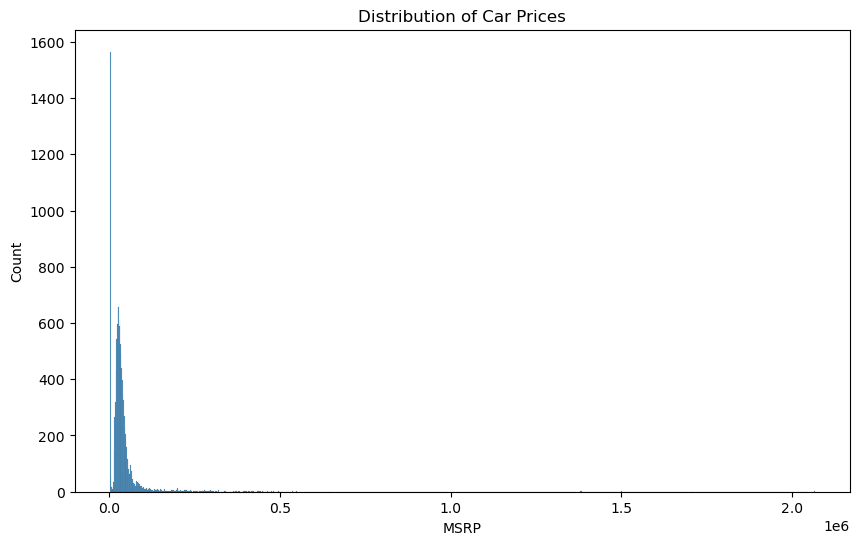

In [7]:
# Analyze the distribution of the target variable (car prices)
plt.figure(figsize=(10, 6))
sns.histplot(df, x='MSRP')
plt.title('Distribution of Car Prices')
plt.xlabel('MSRP')
plt.ylabel('Count')
plt.show()

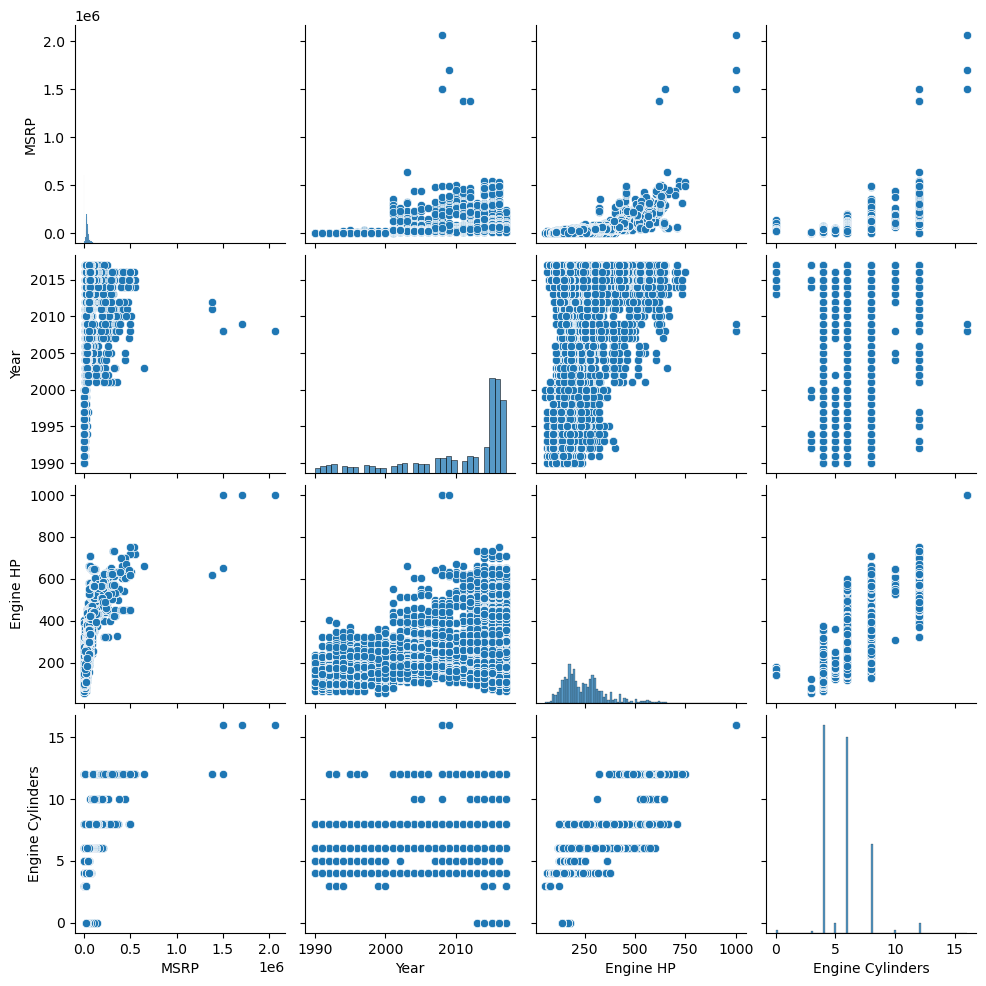

In [8]:
# Visualize relationships between the target variable and other features
sns.pairplot(df, vars=['MSRP', 'Year', 'Engine HP', 'Engine Cylinders'])
plt.show()

In [9]:
# Identify the features available in the dataset
features = df.columns.tolist()
print(features)

['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP', 'Engine Cylinders', 'Transmission Type', 'Driven_Wheels', 'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style', 'highway MPG', 'city mpg', 'Popularity', 'MSRP']


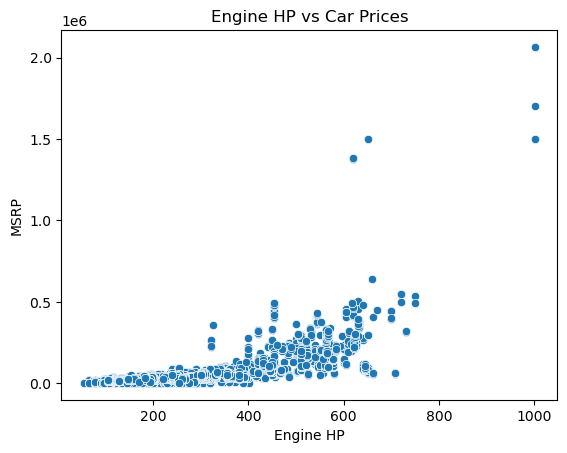

In [10]:
# Visualize relationships between the target variable and different features
sns.scatterplot(data=df, x='Engine HP', y='MSRP')
plt.title('Engine HP vs Car Prices')
plt.xlabel('Engine HP')
plt.ylabel('MSRP')
plt.show()

In [11]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


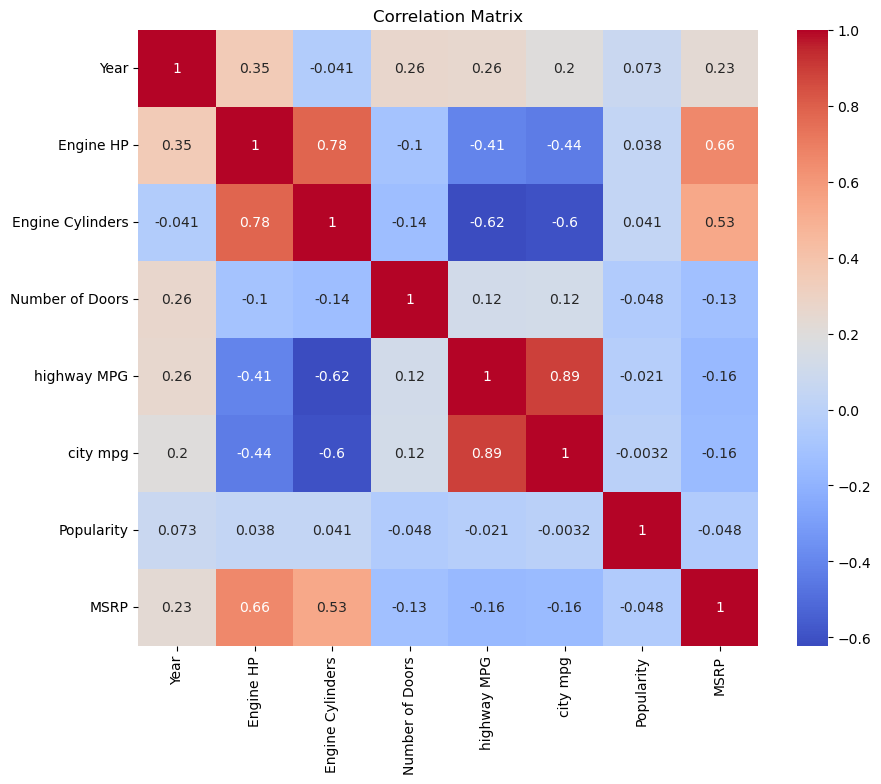

In [12]:
# Perform correlation analysis
correlation_matrix = df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [13]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

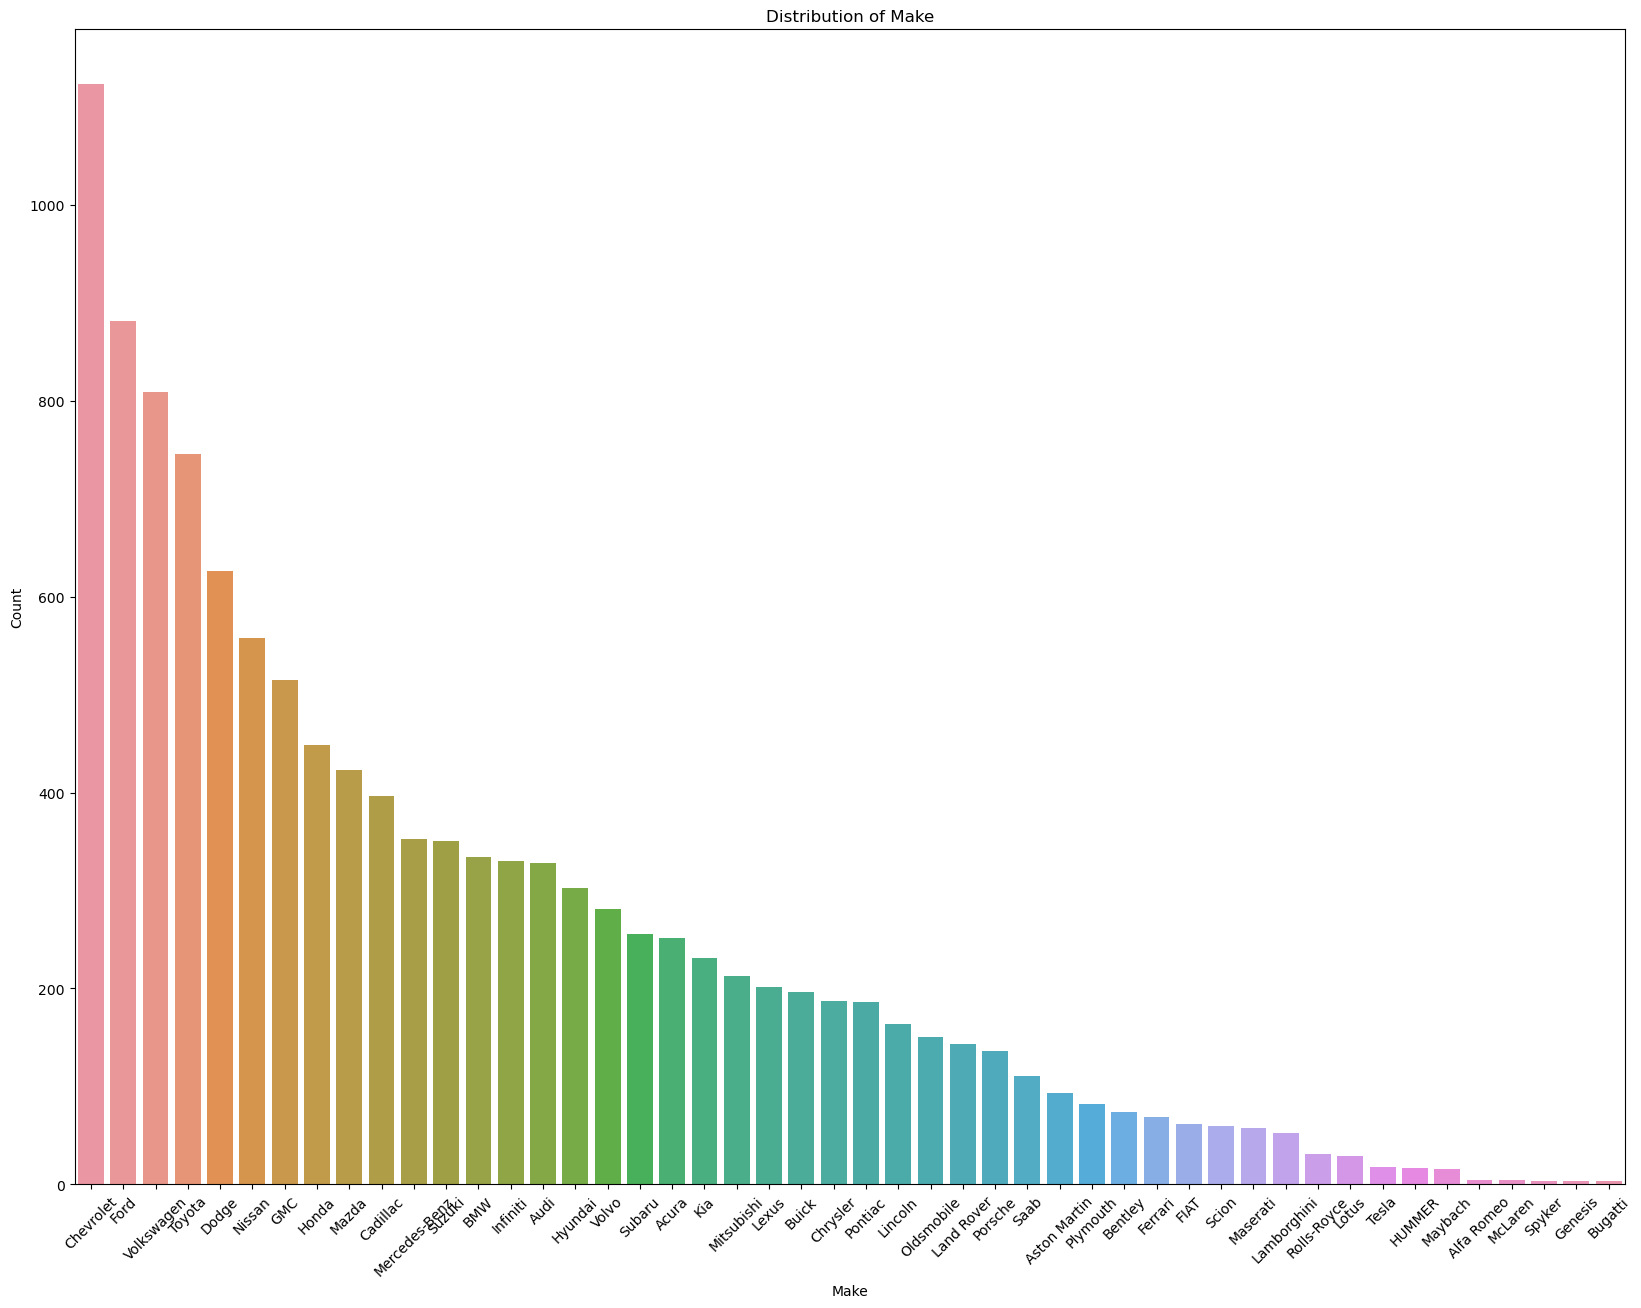

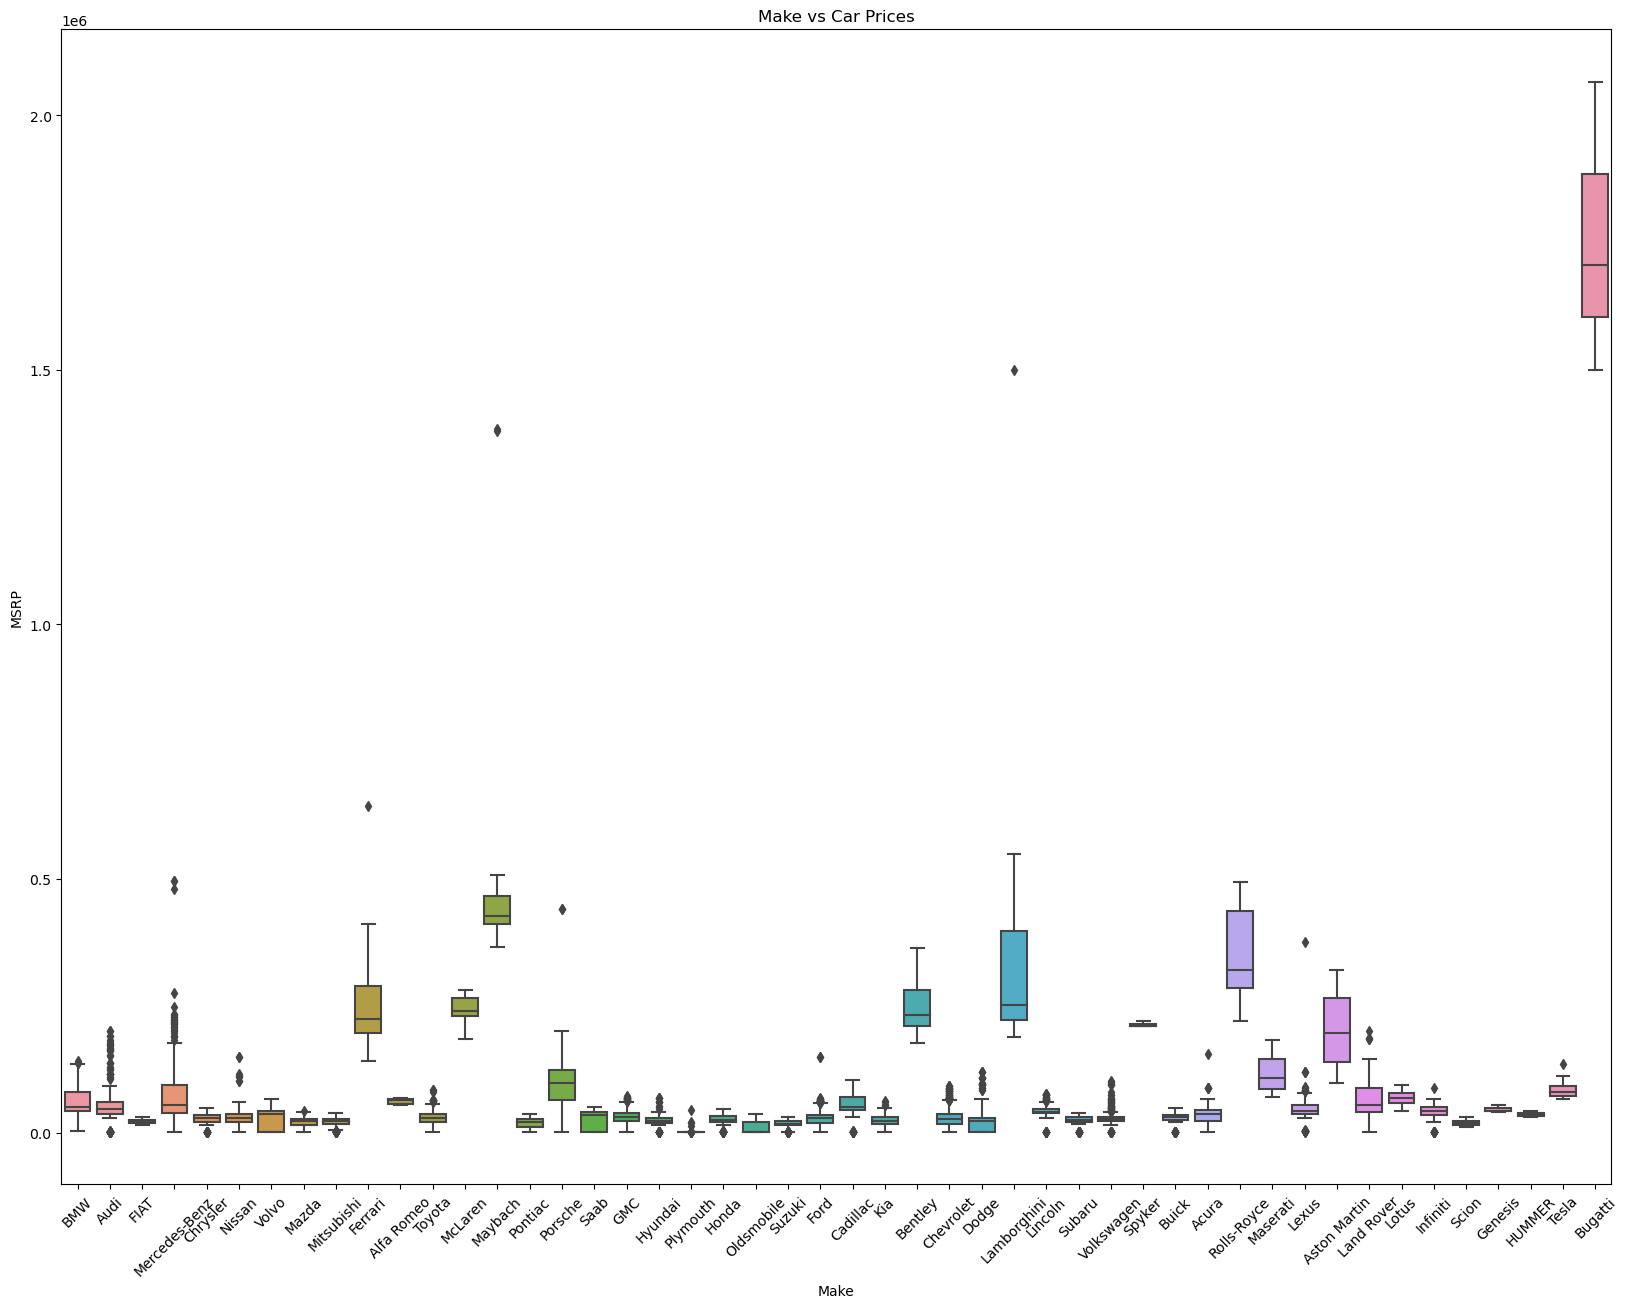

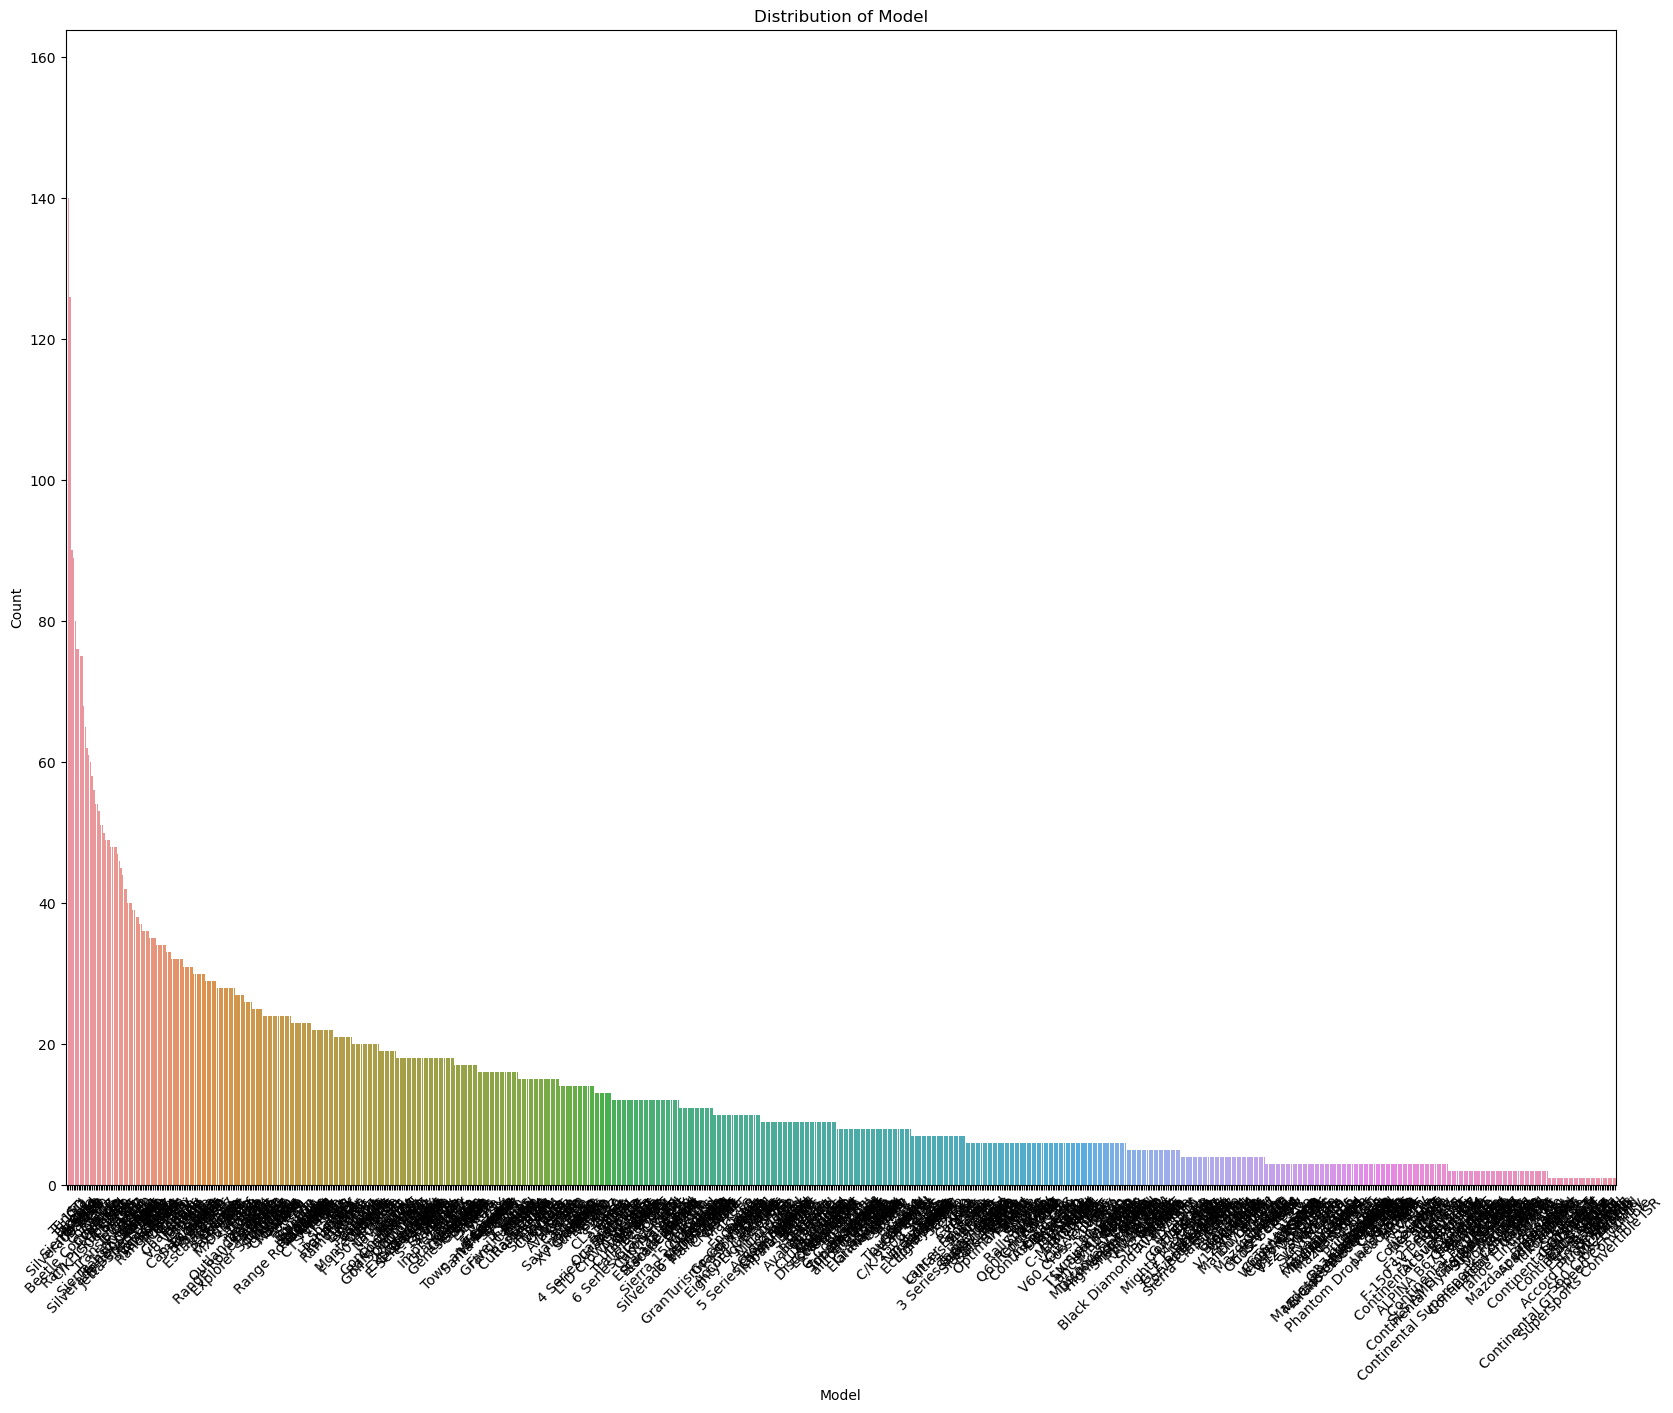

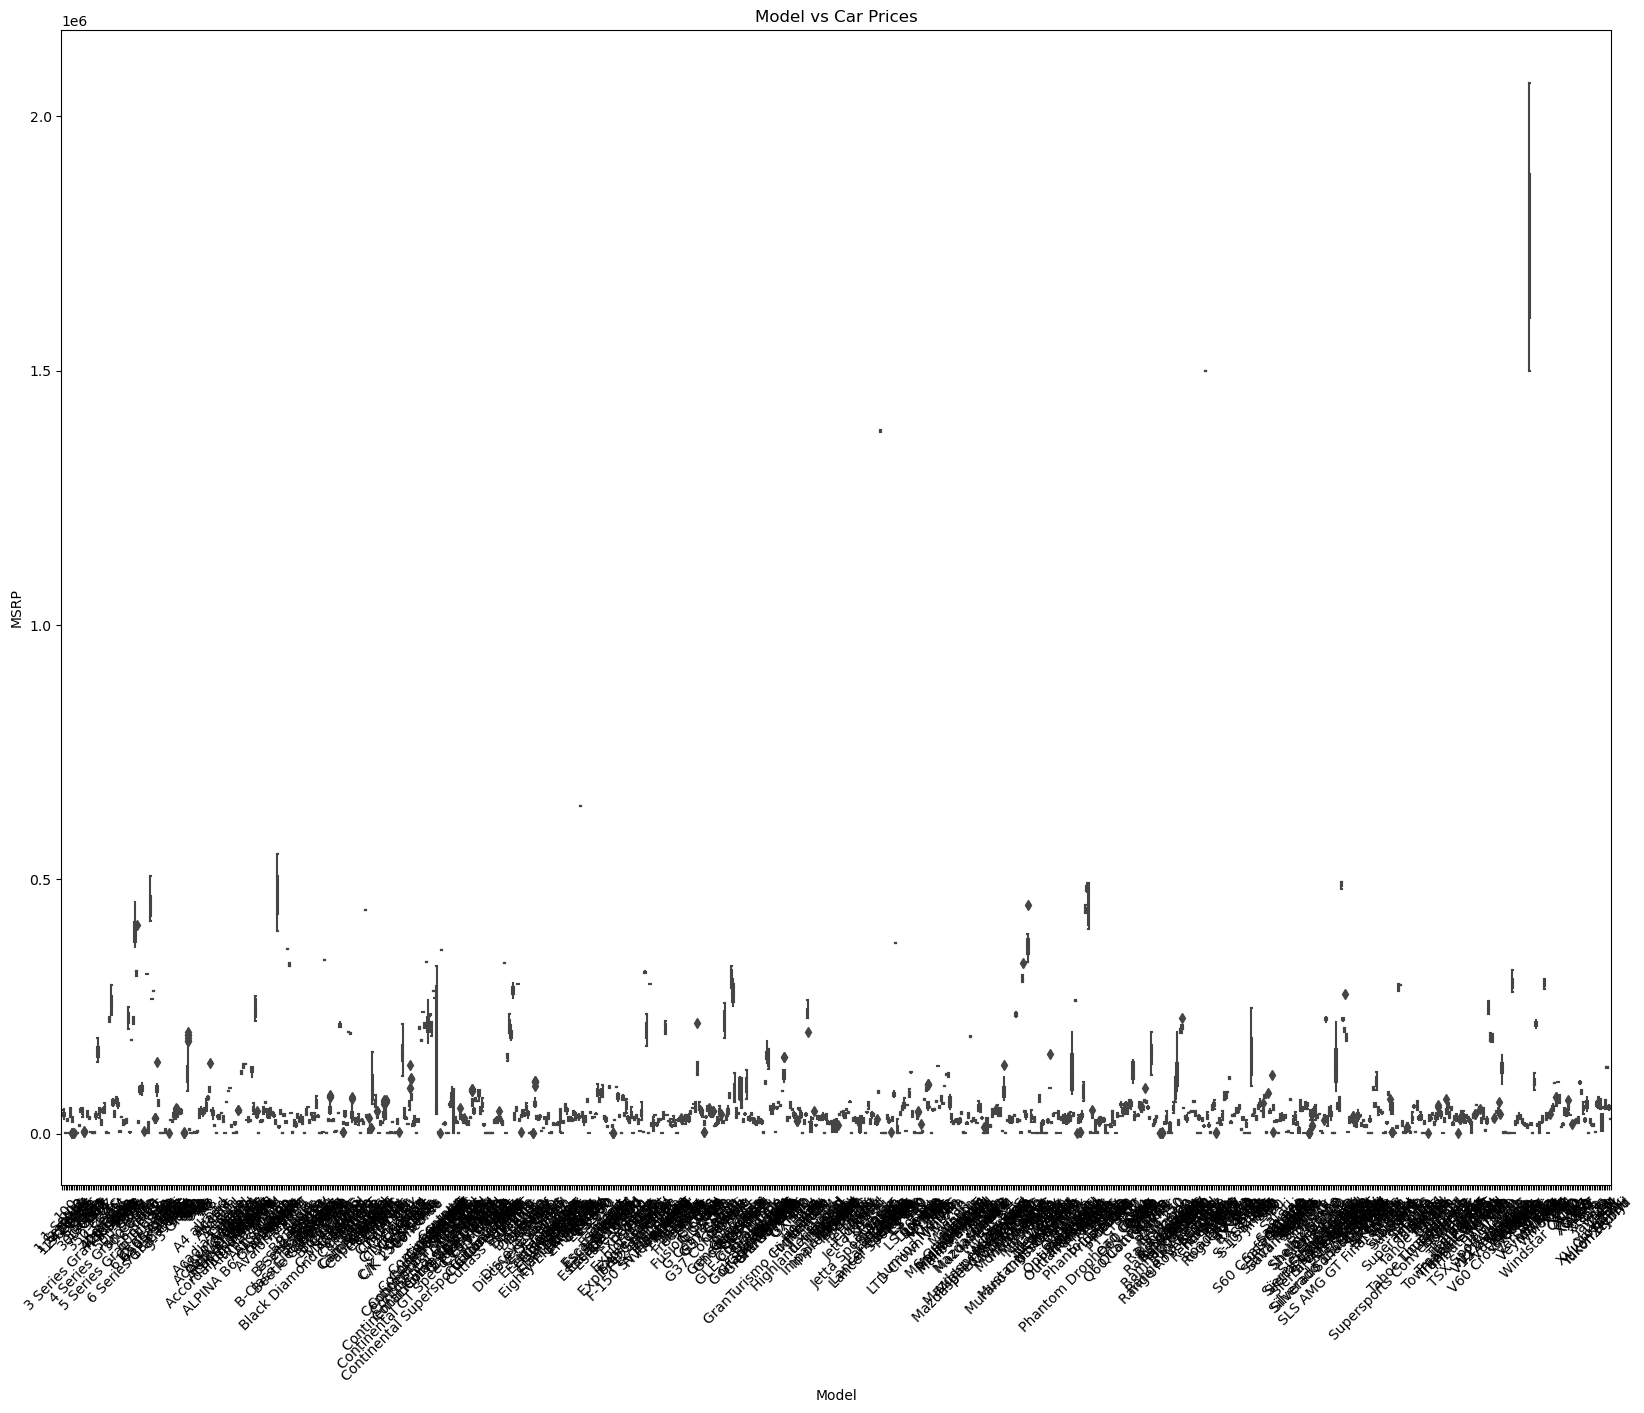

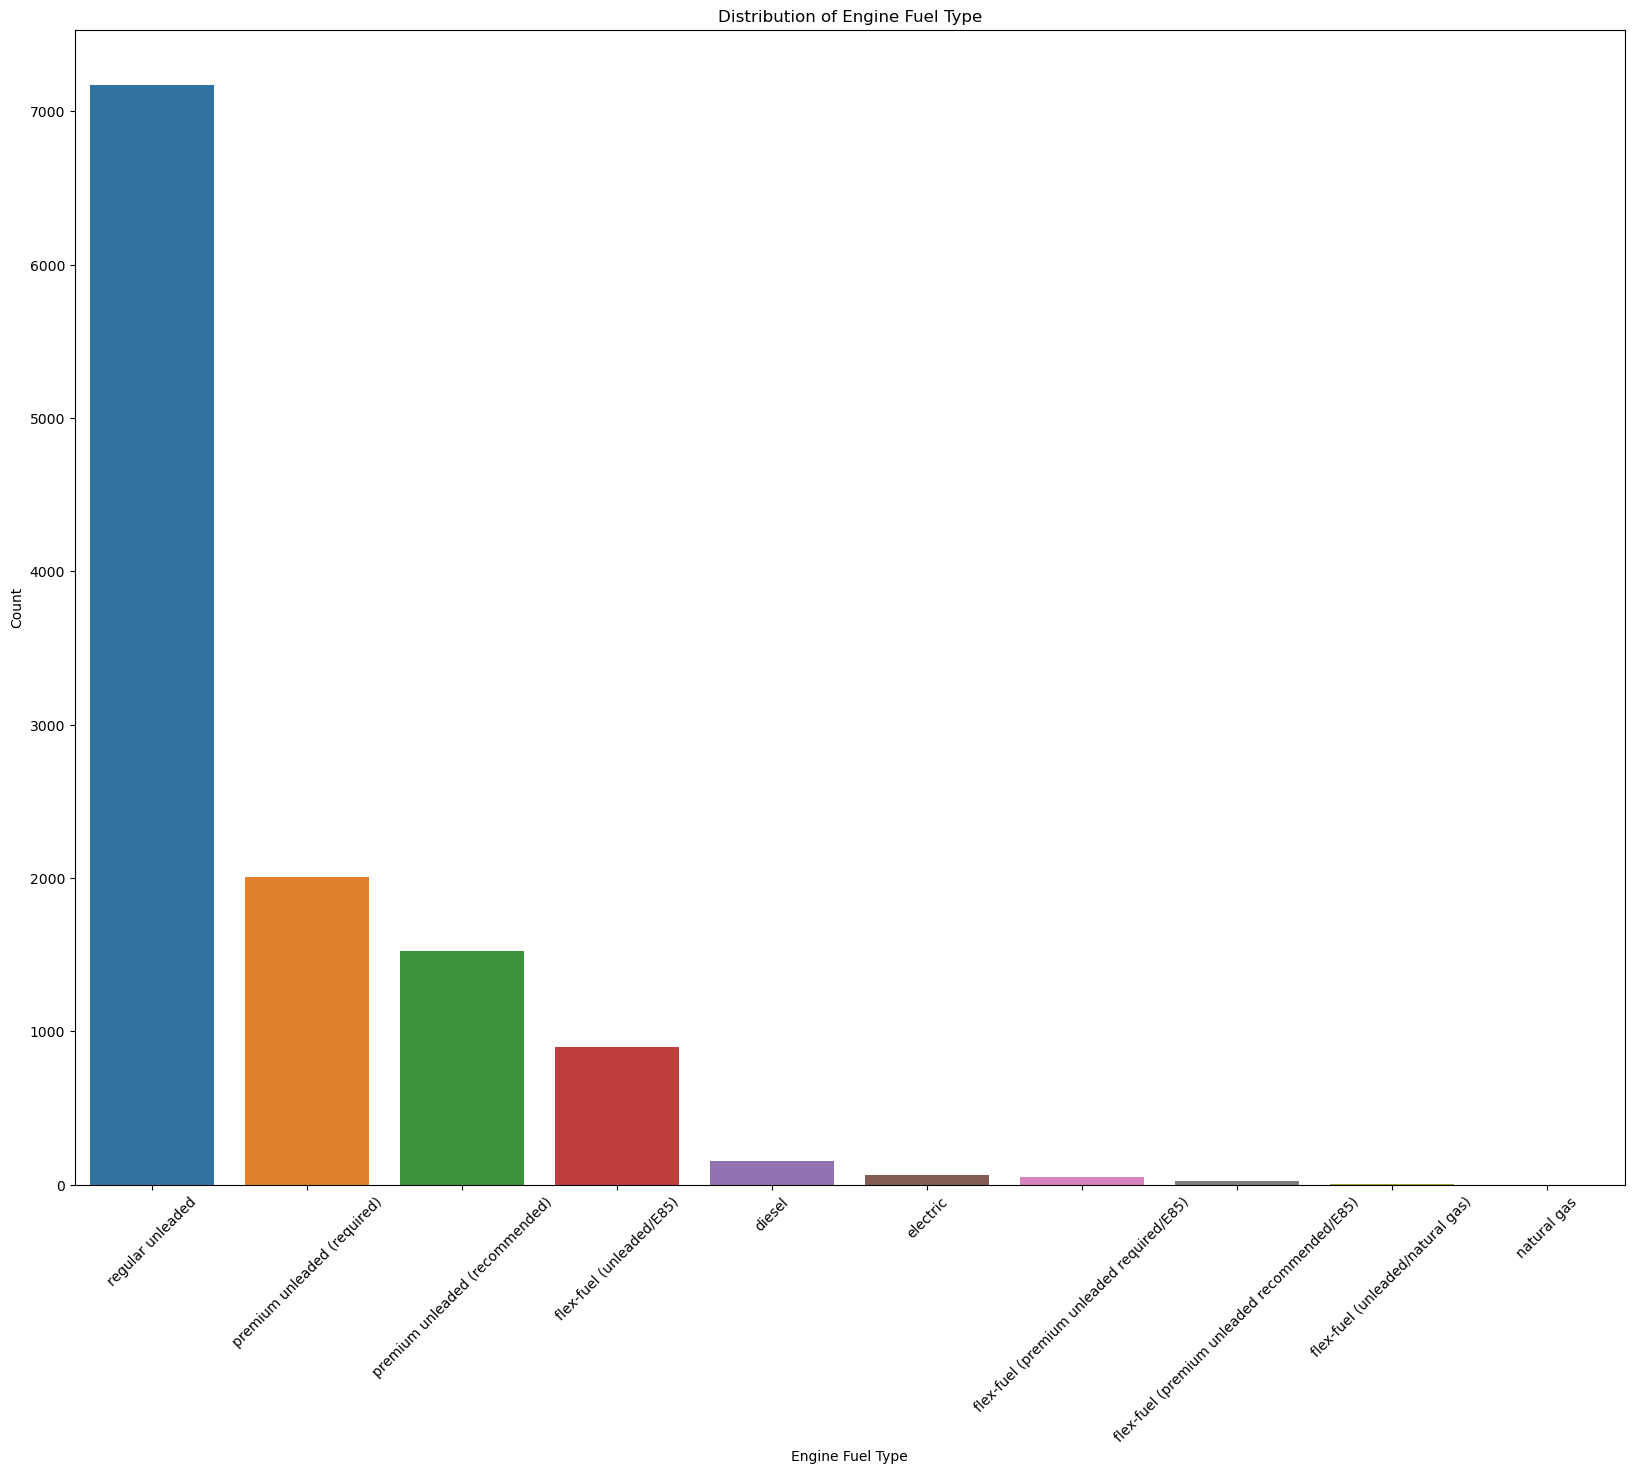

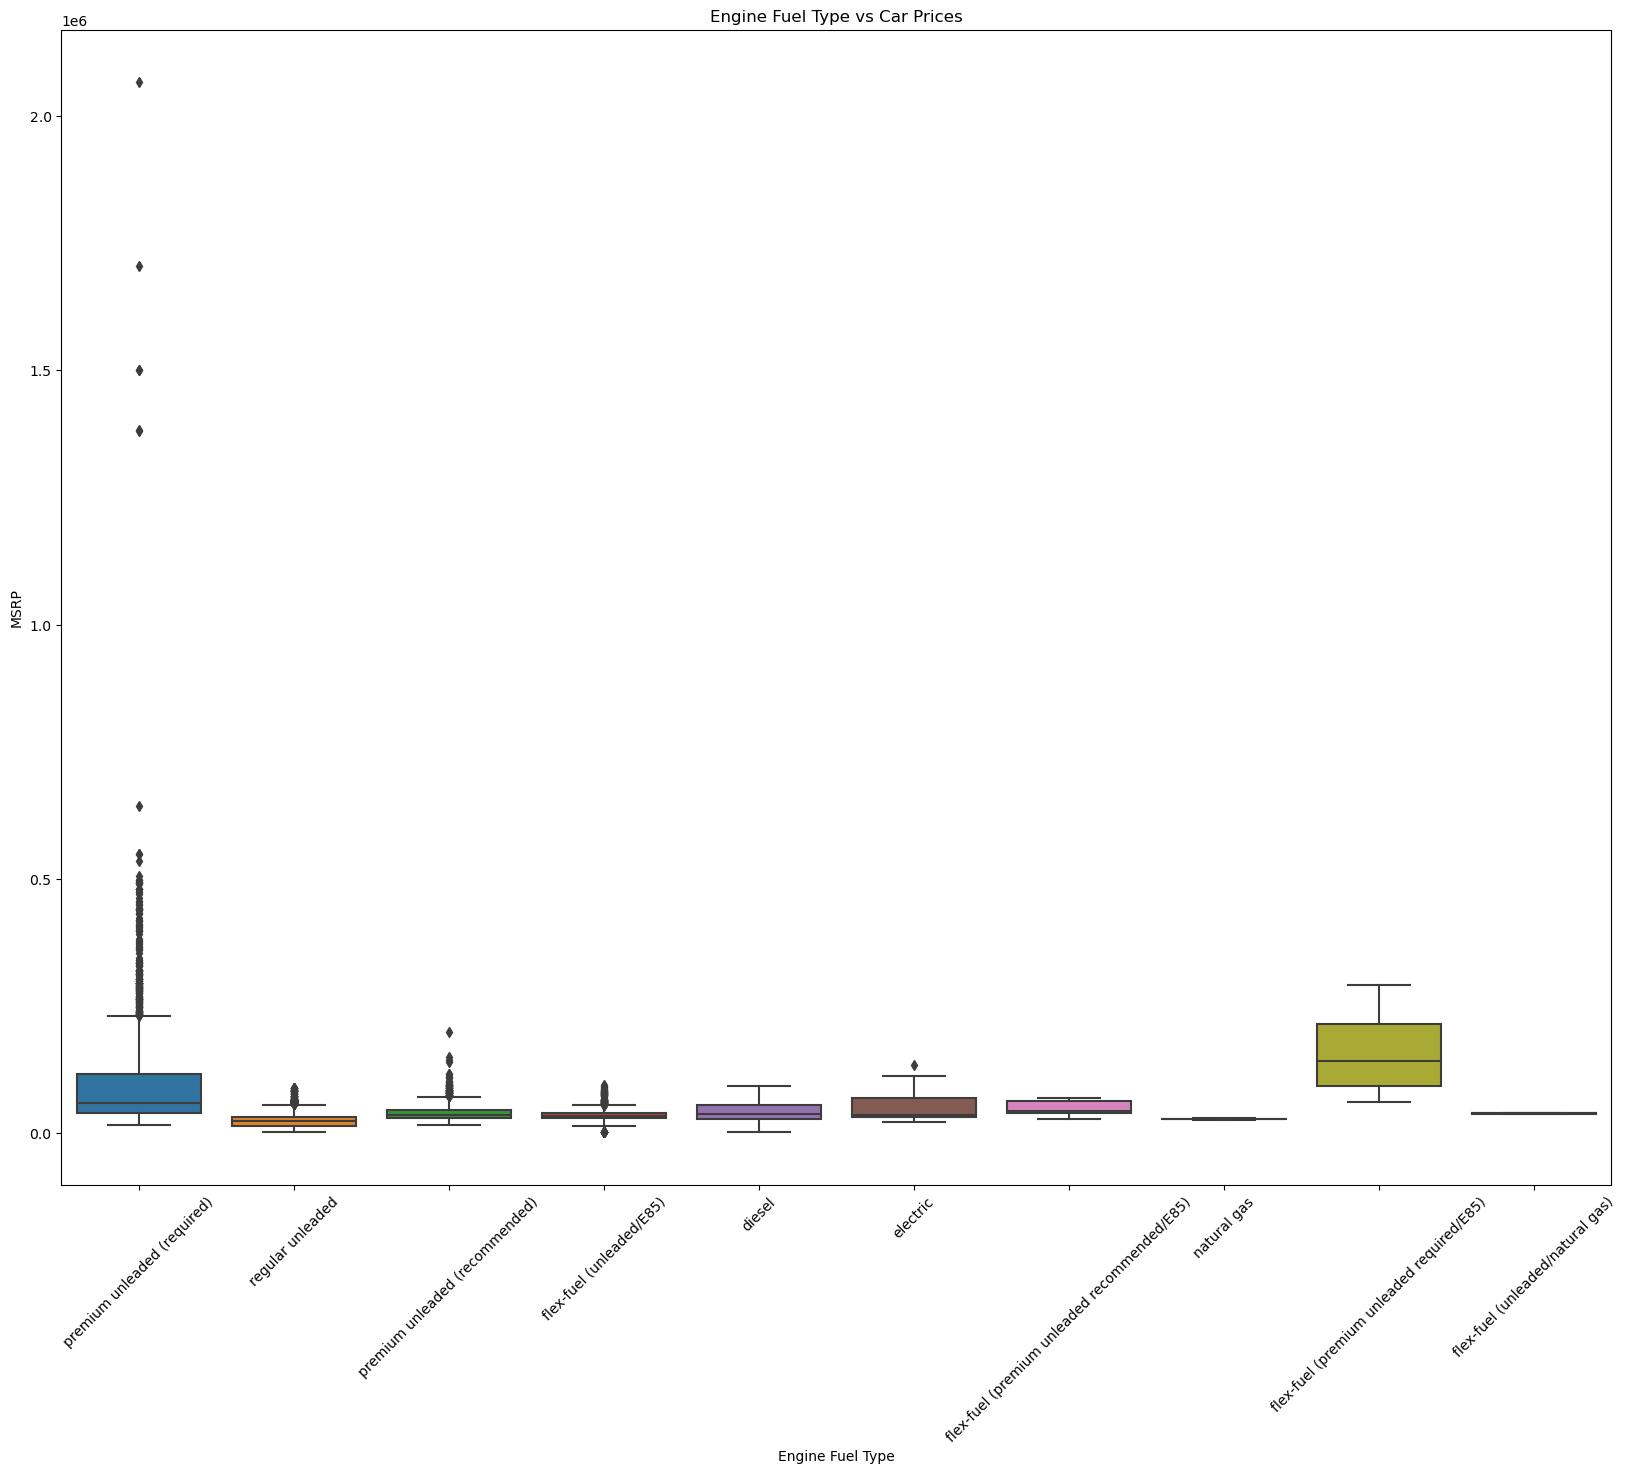

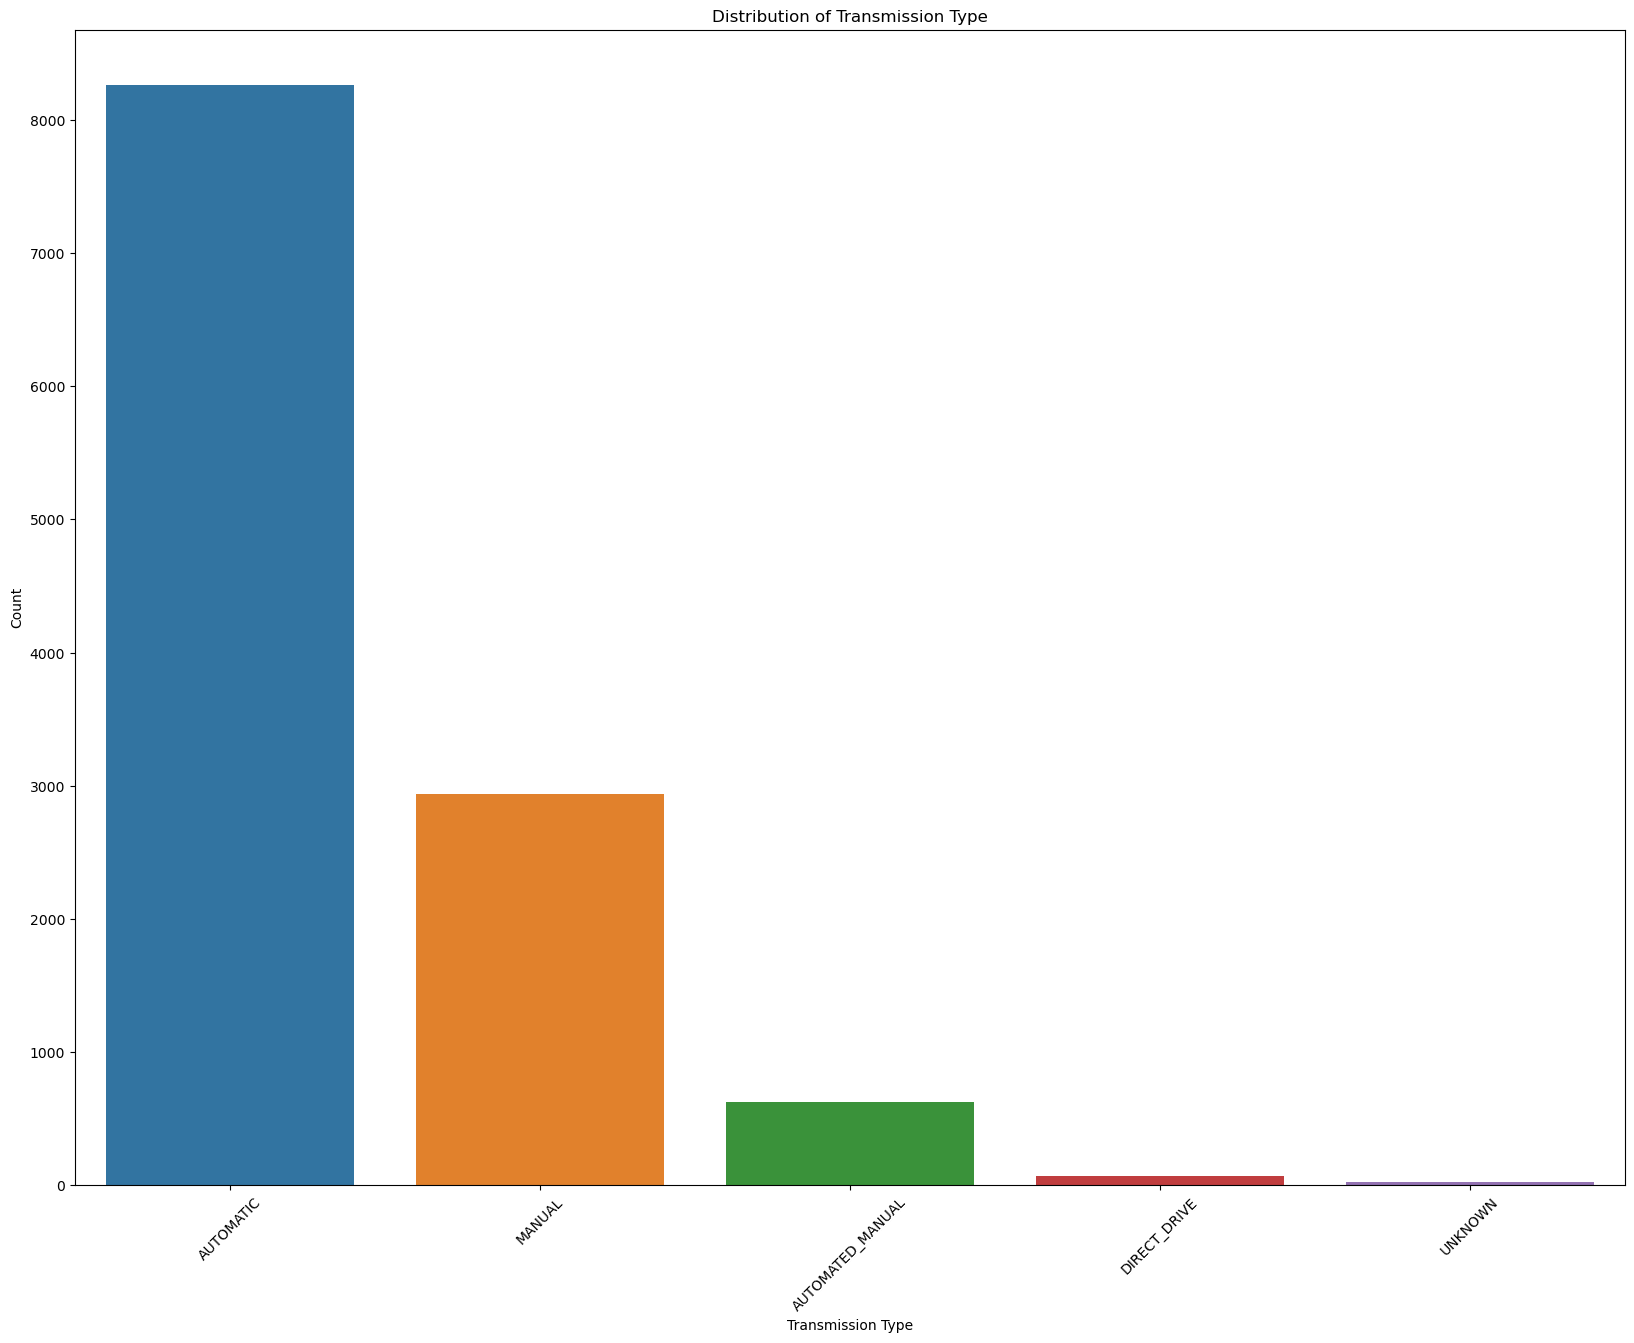

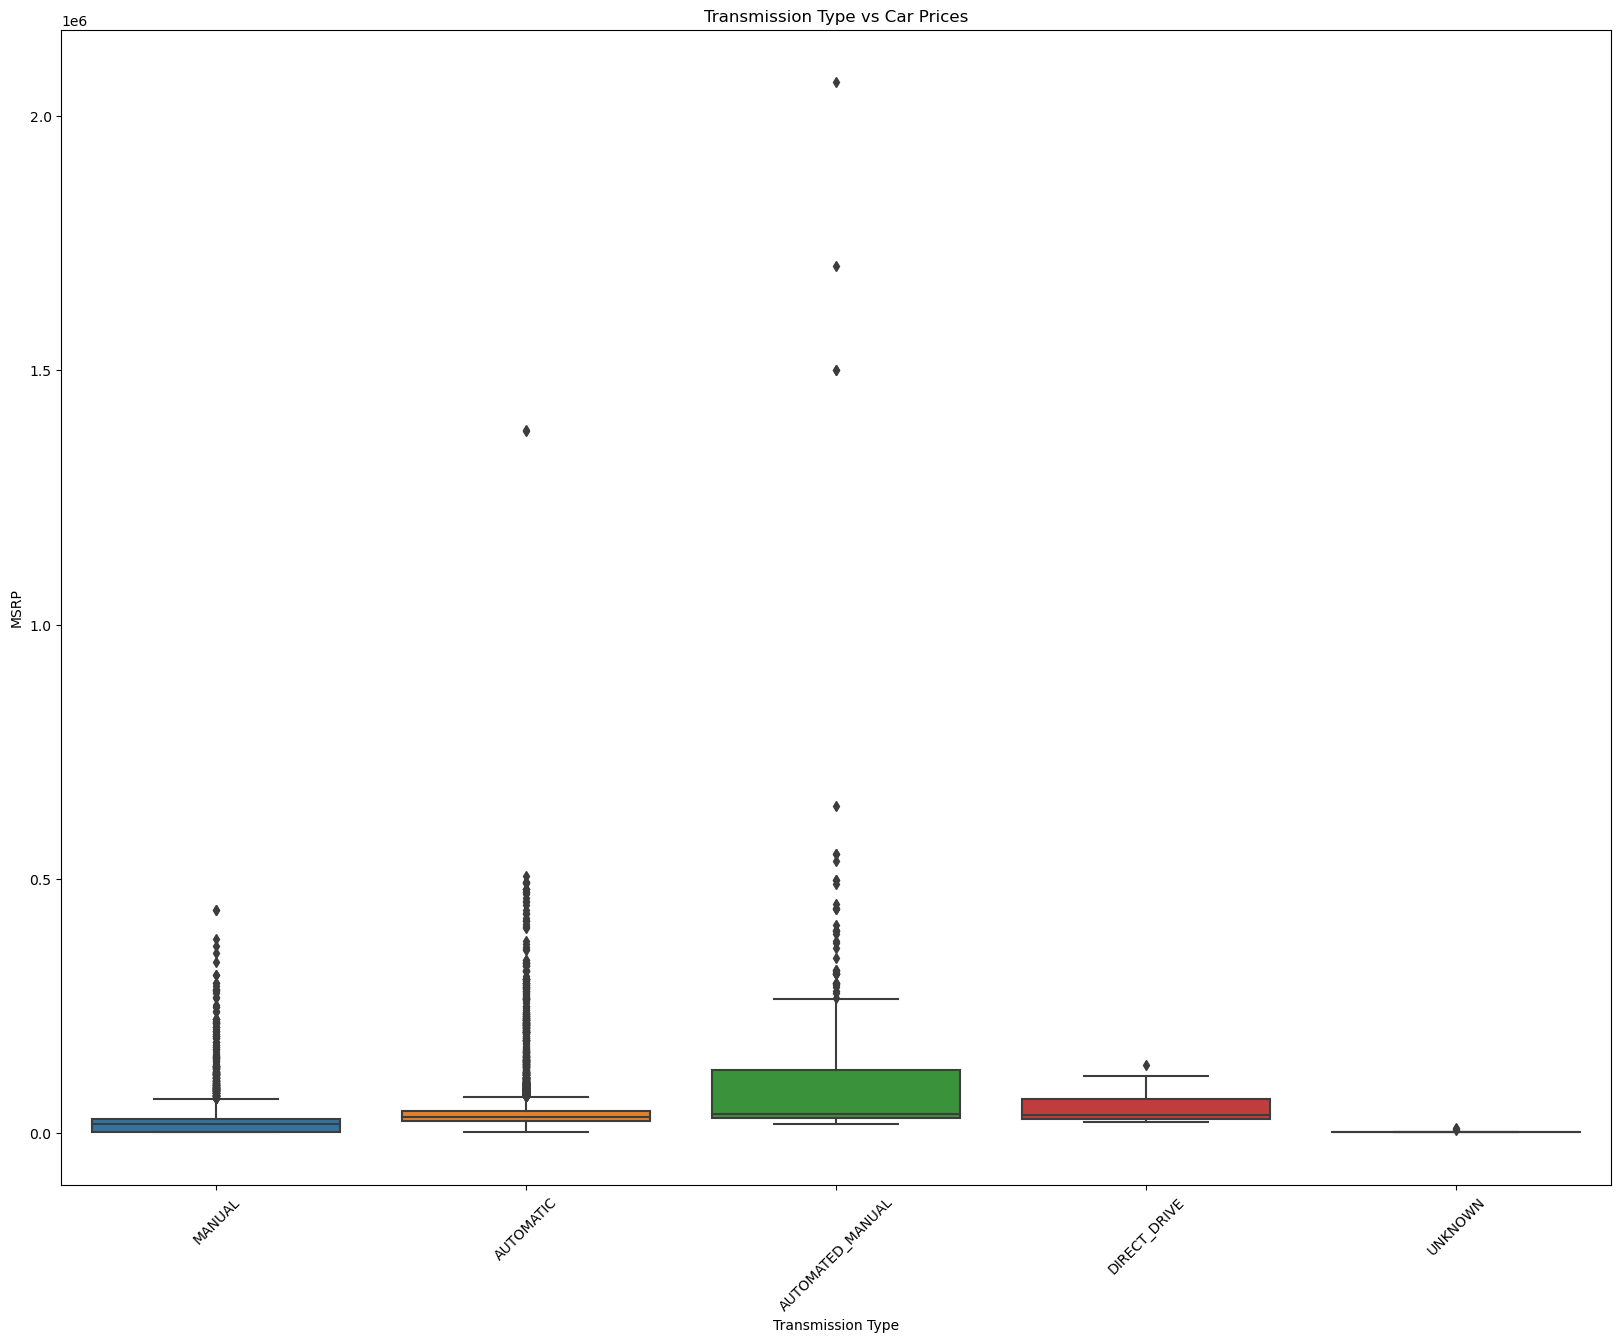

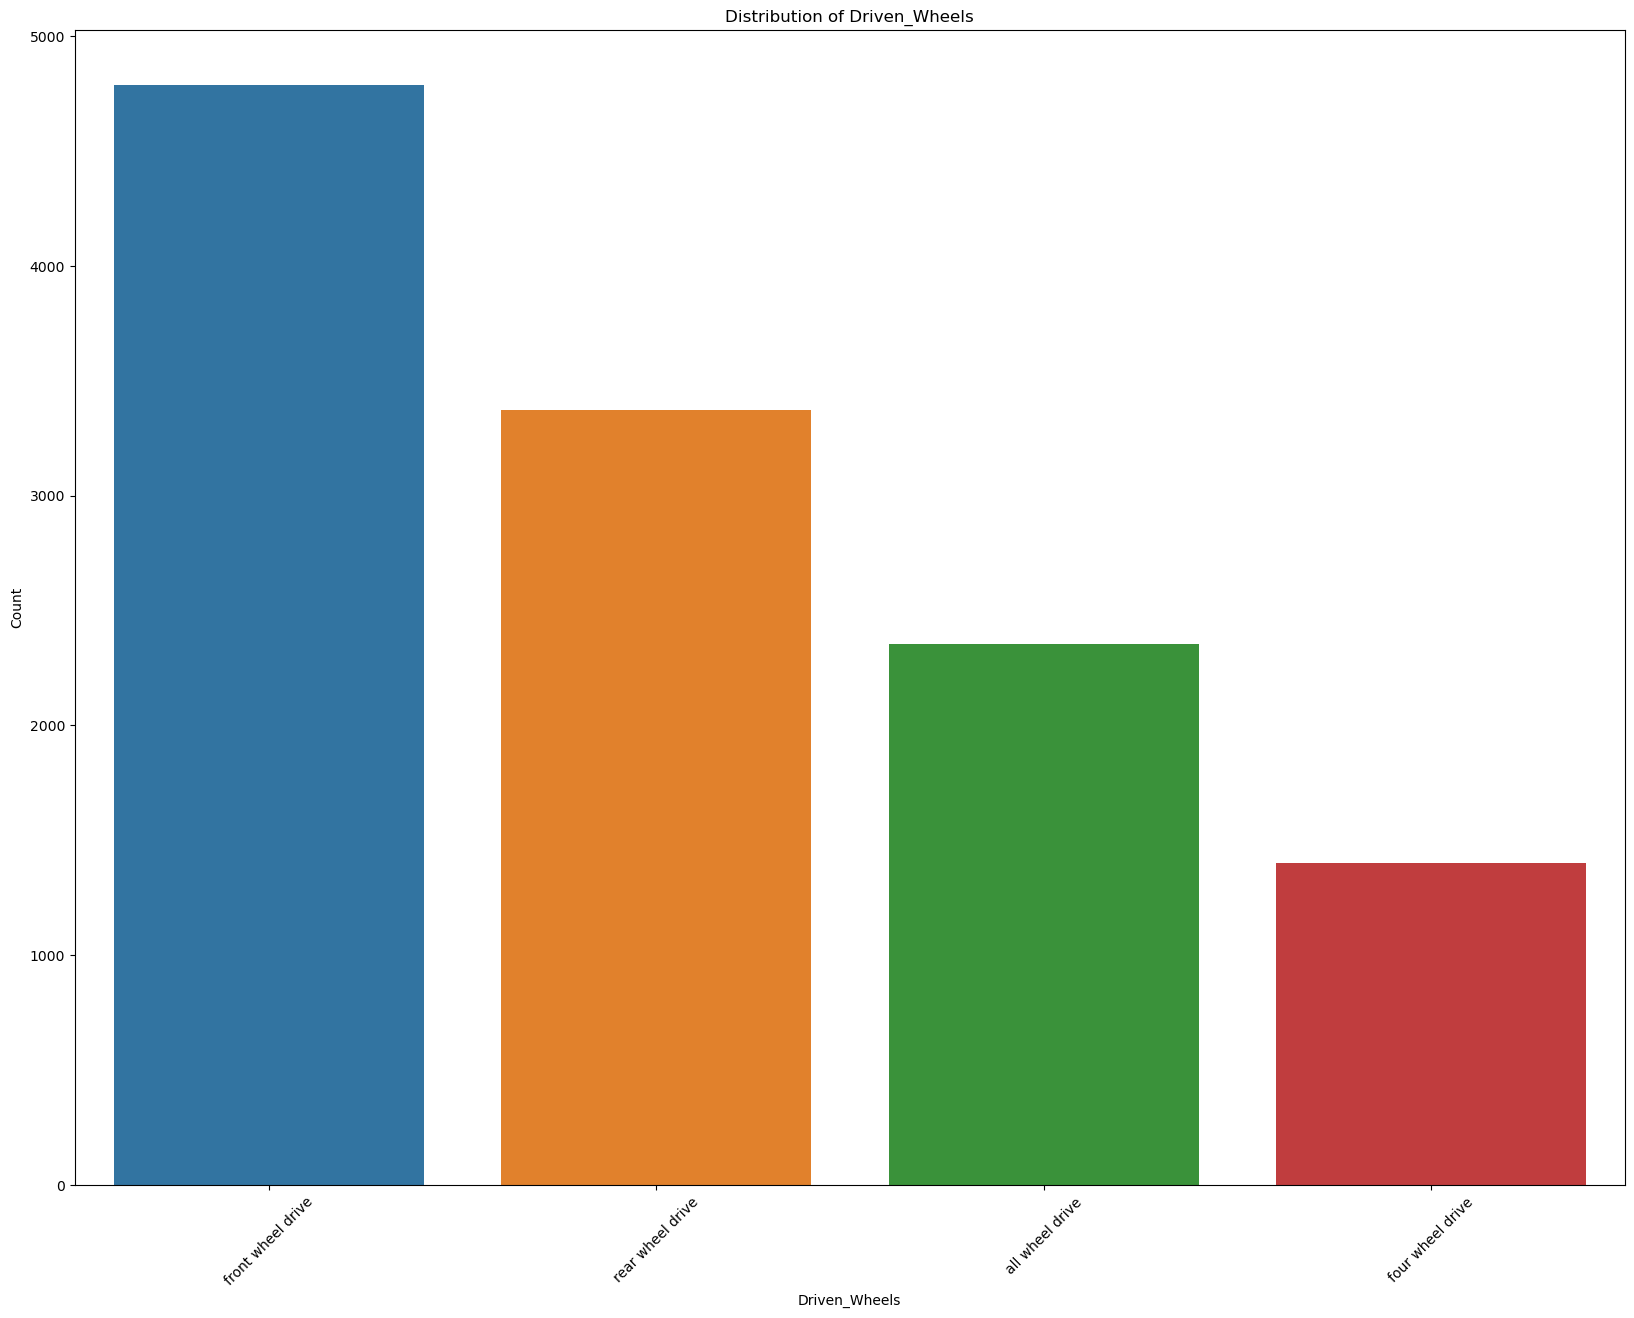

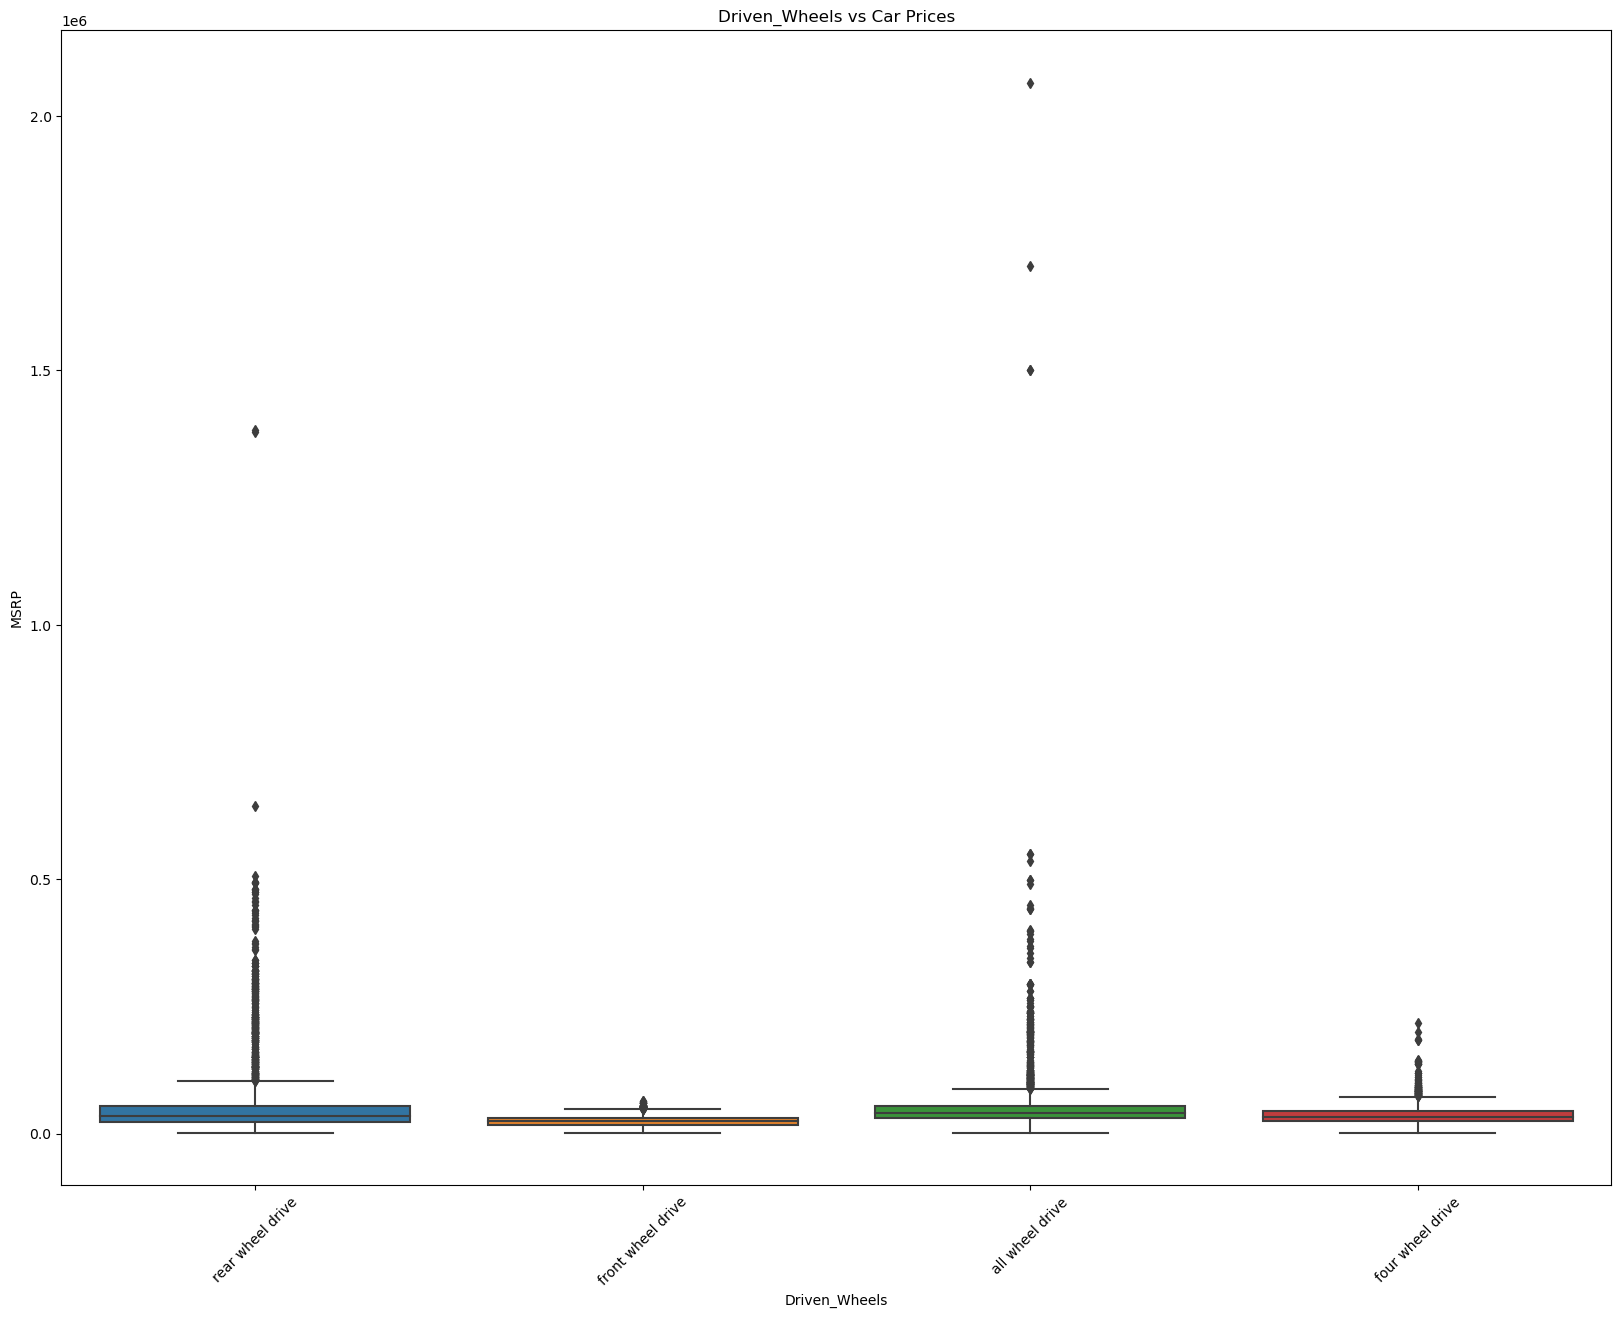

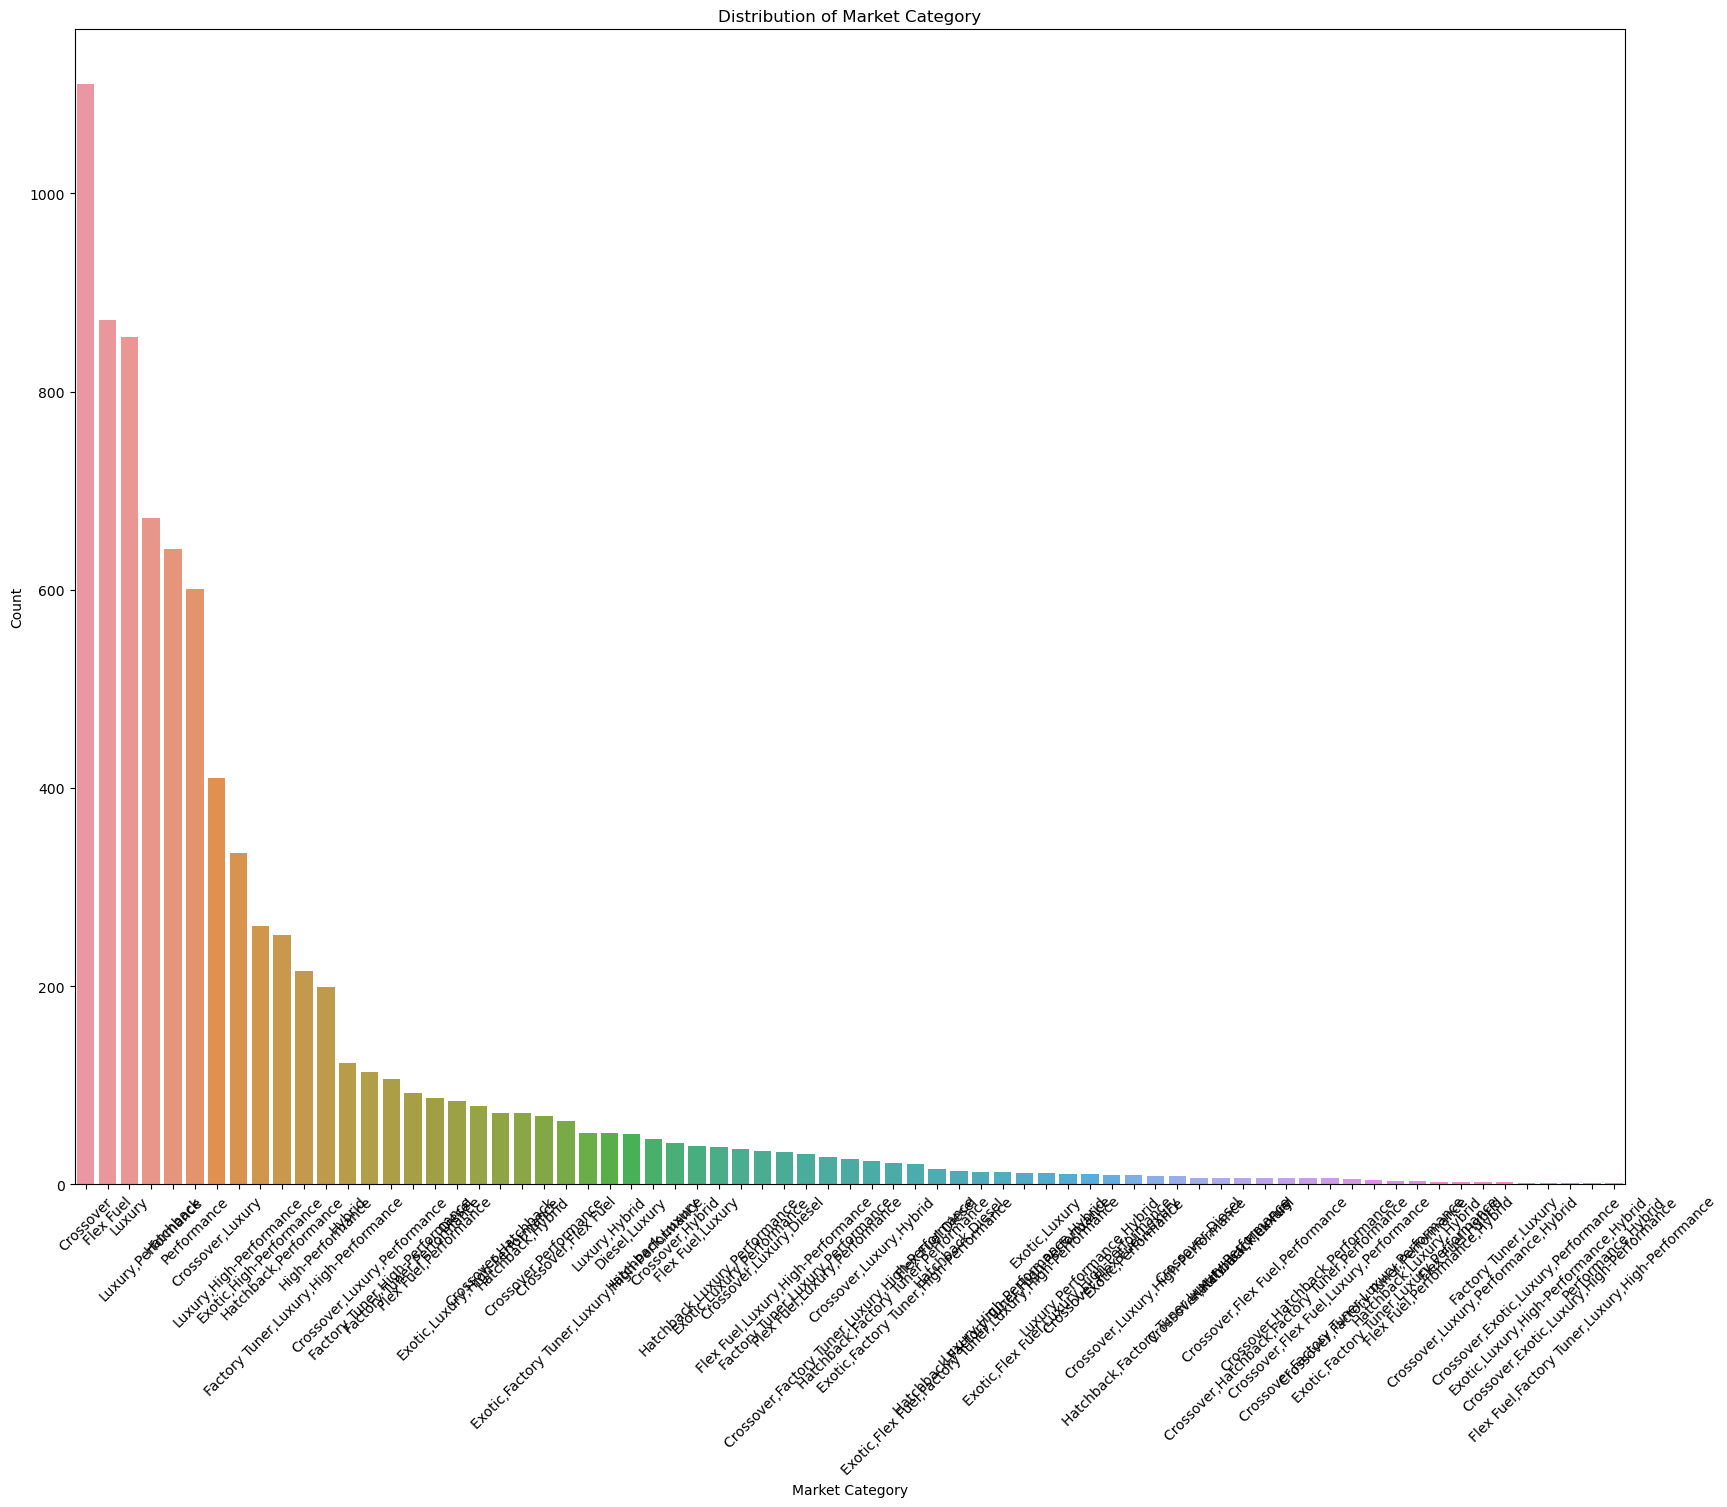

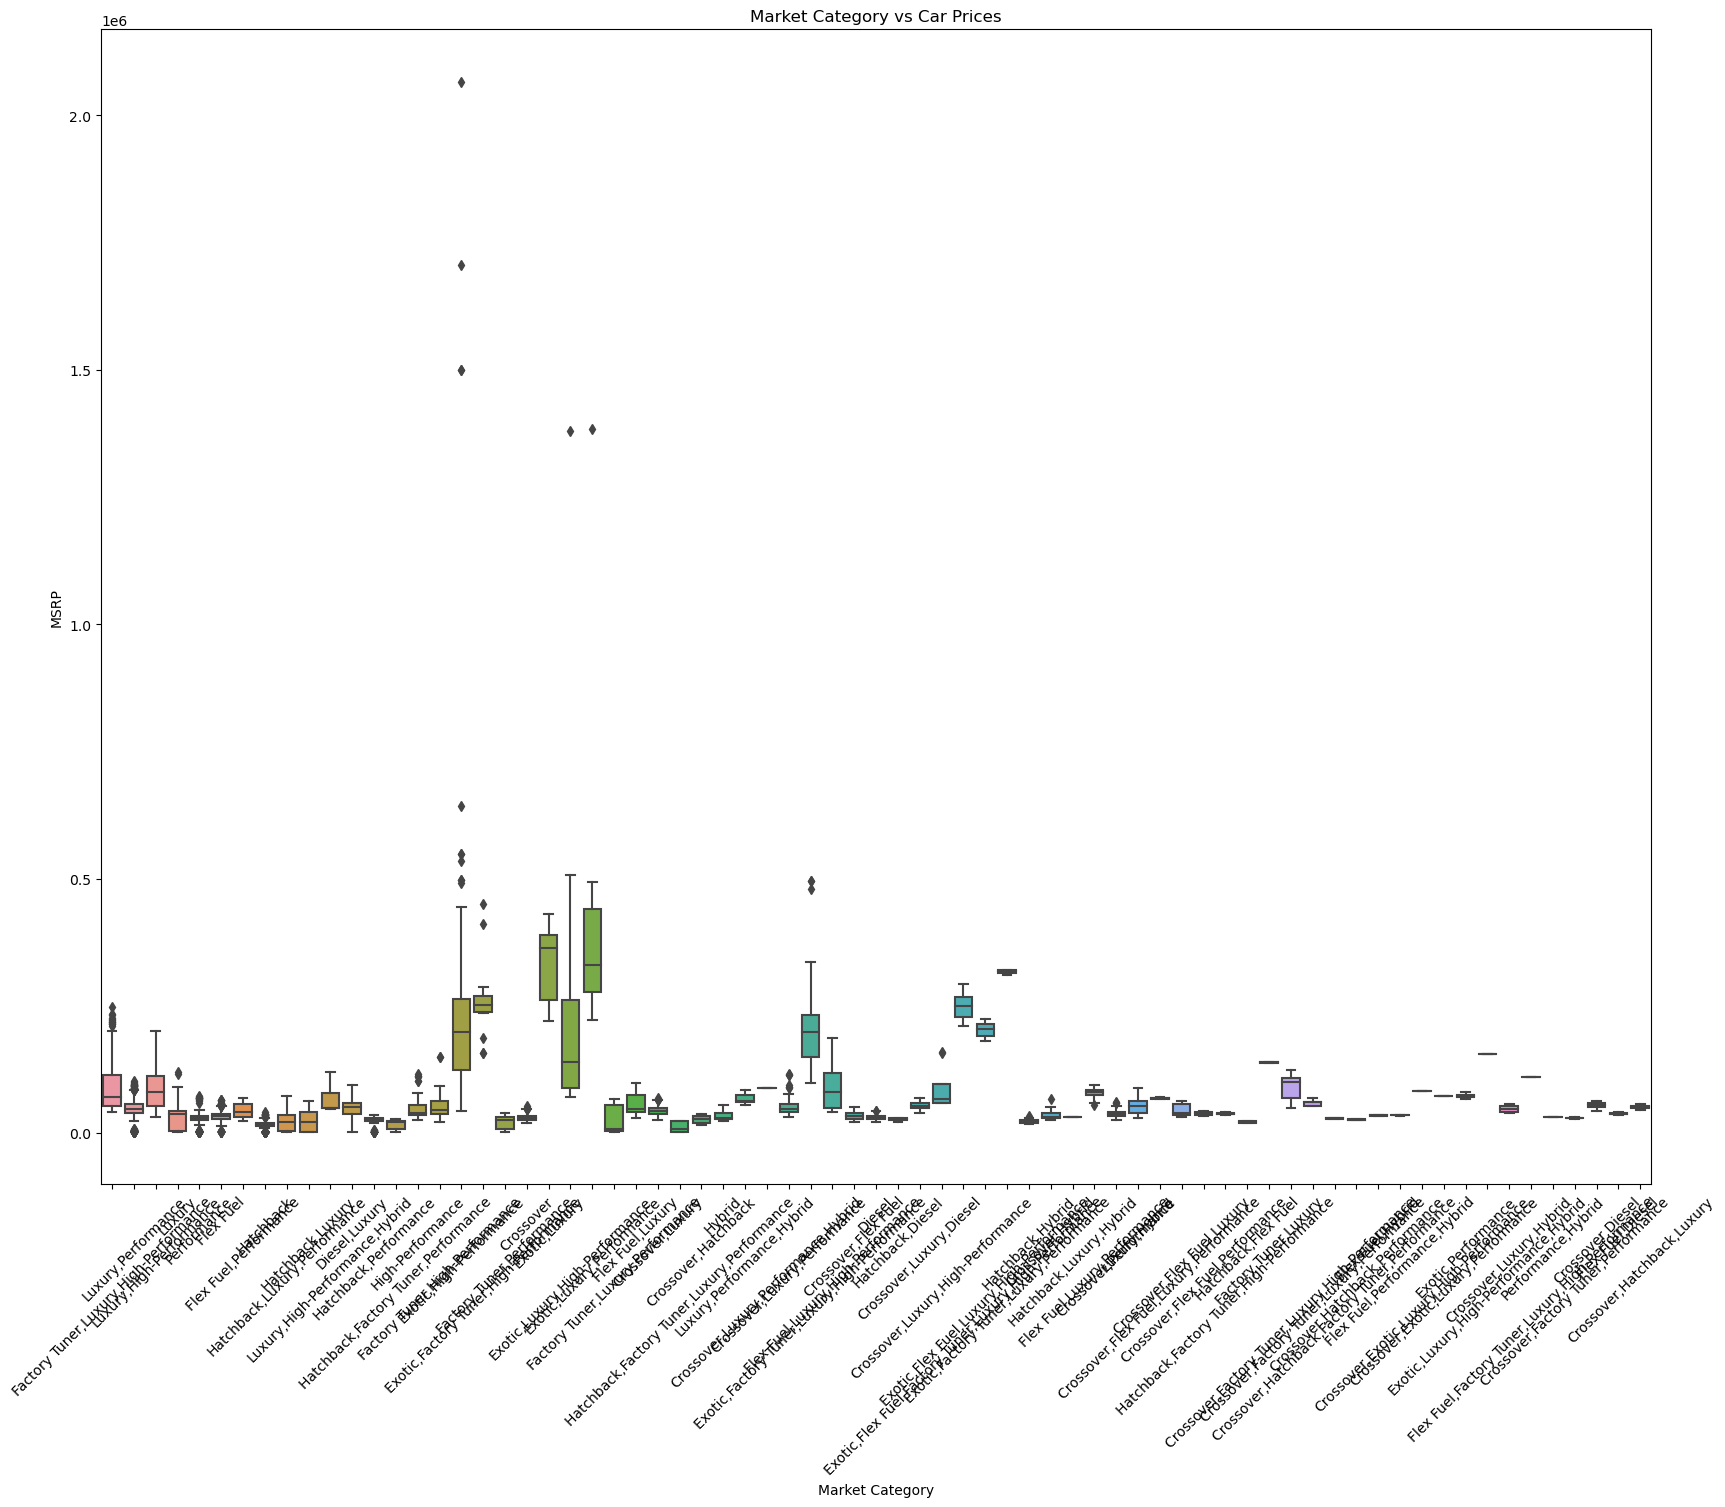

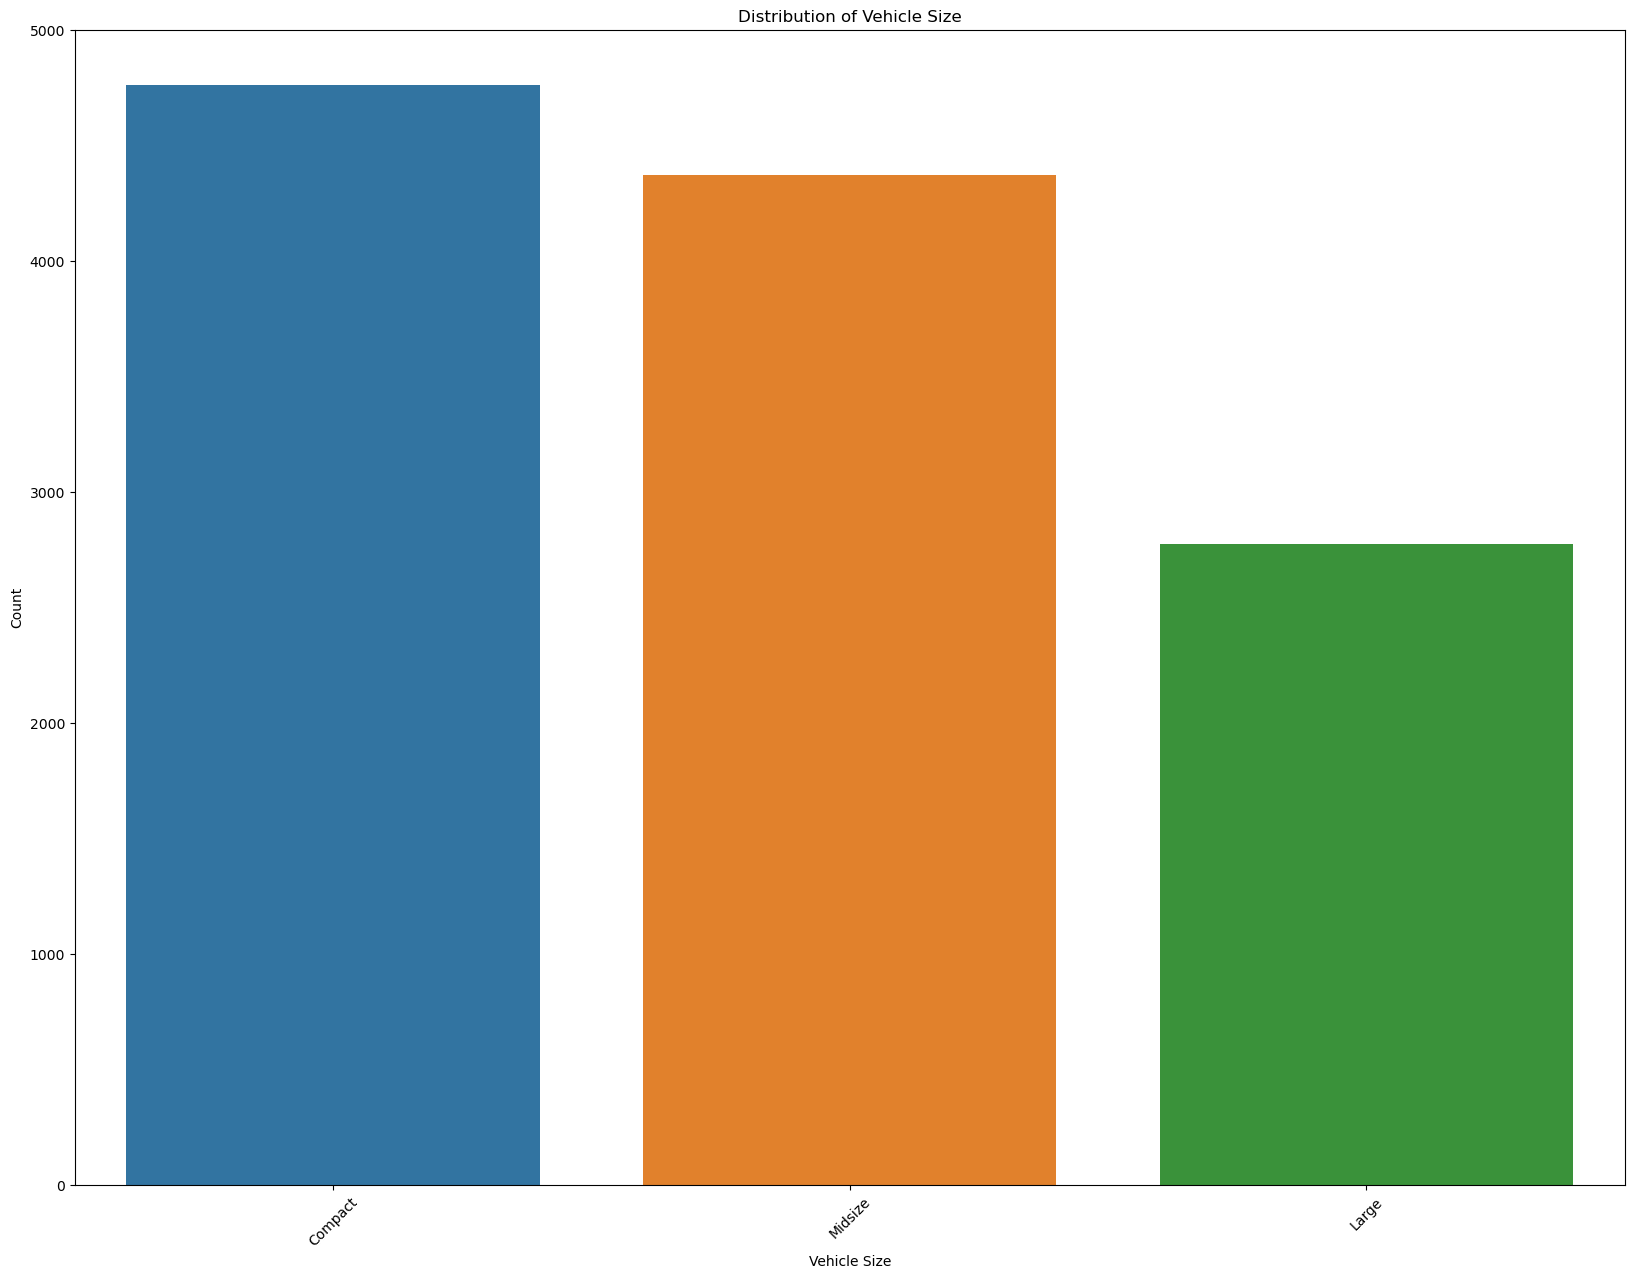

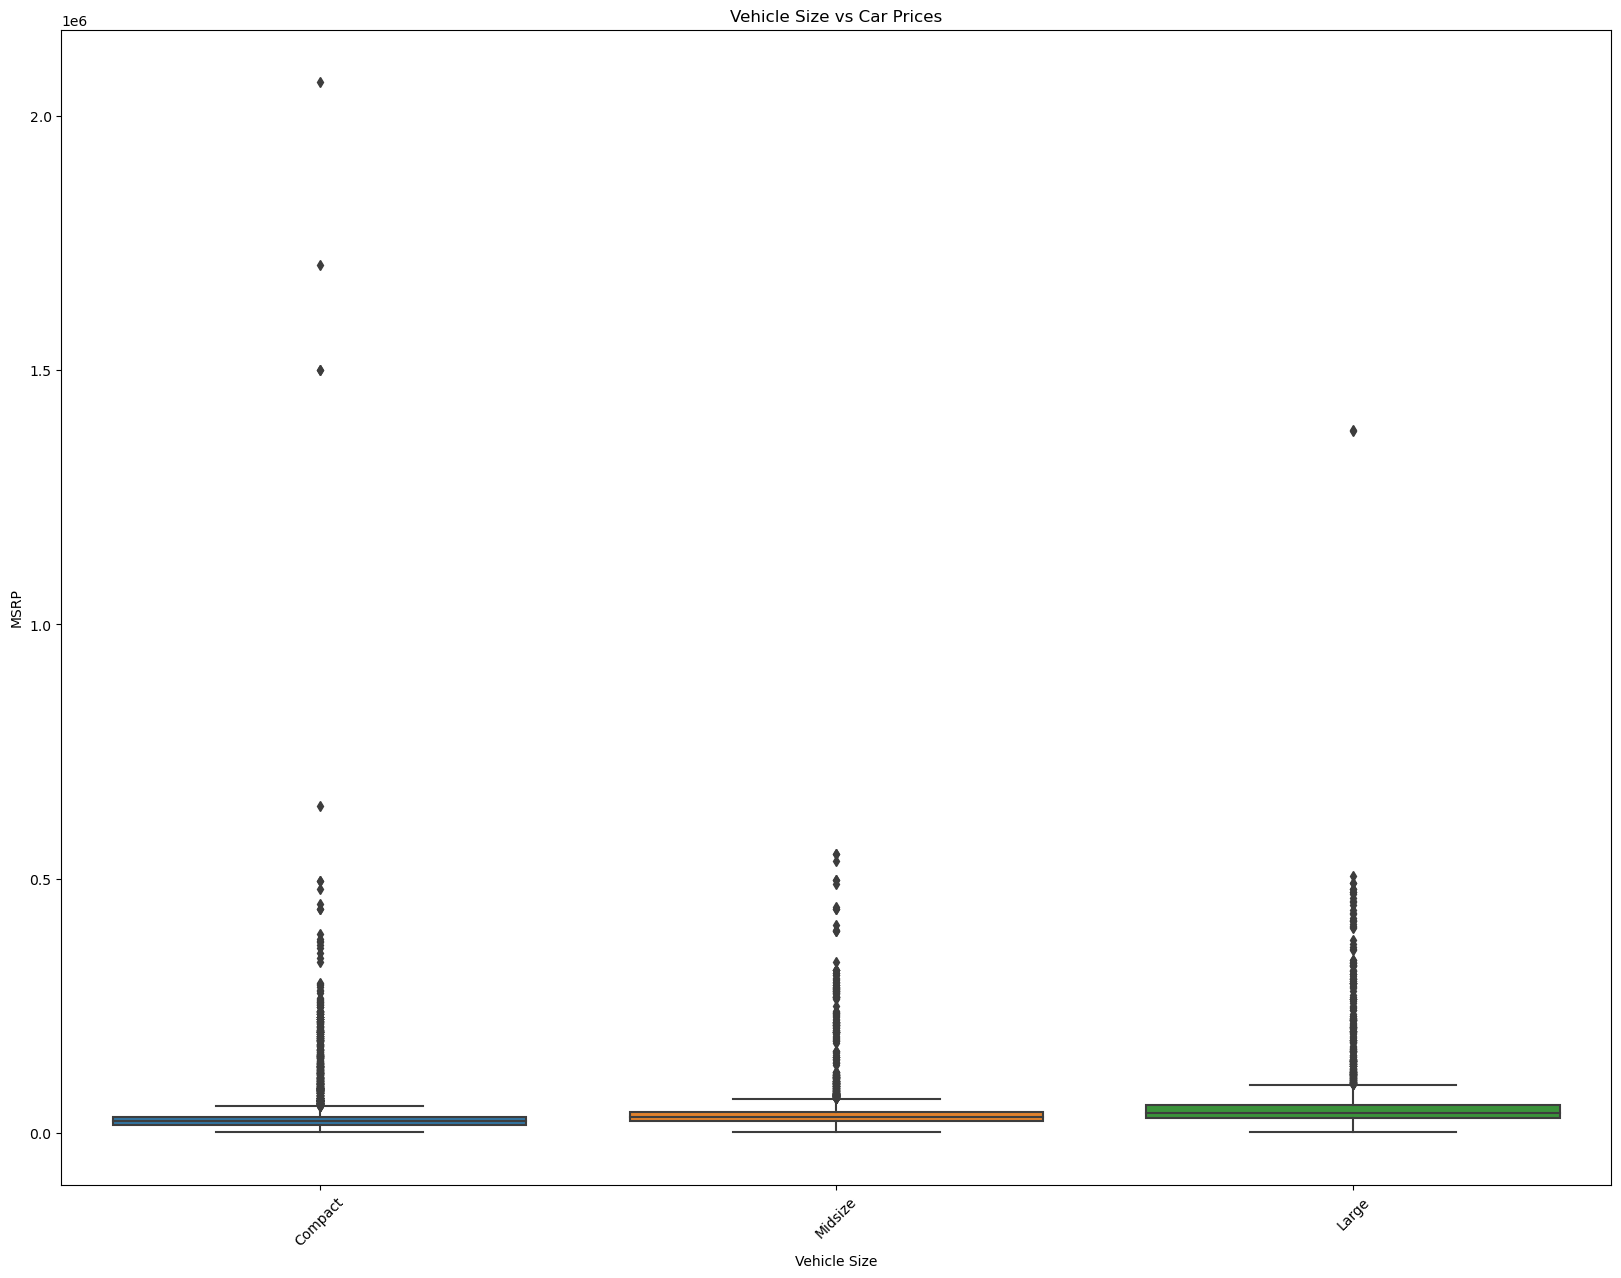

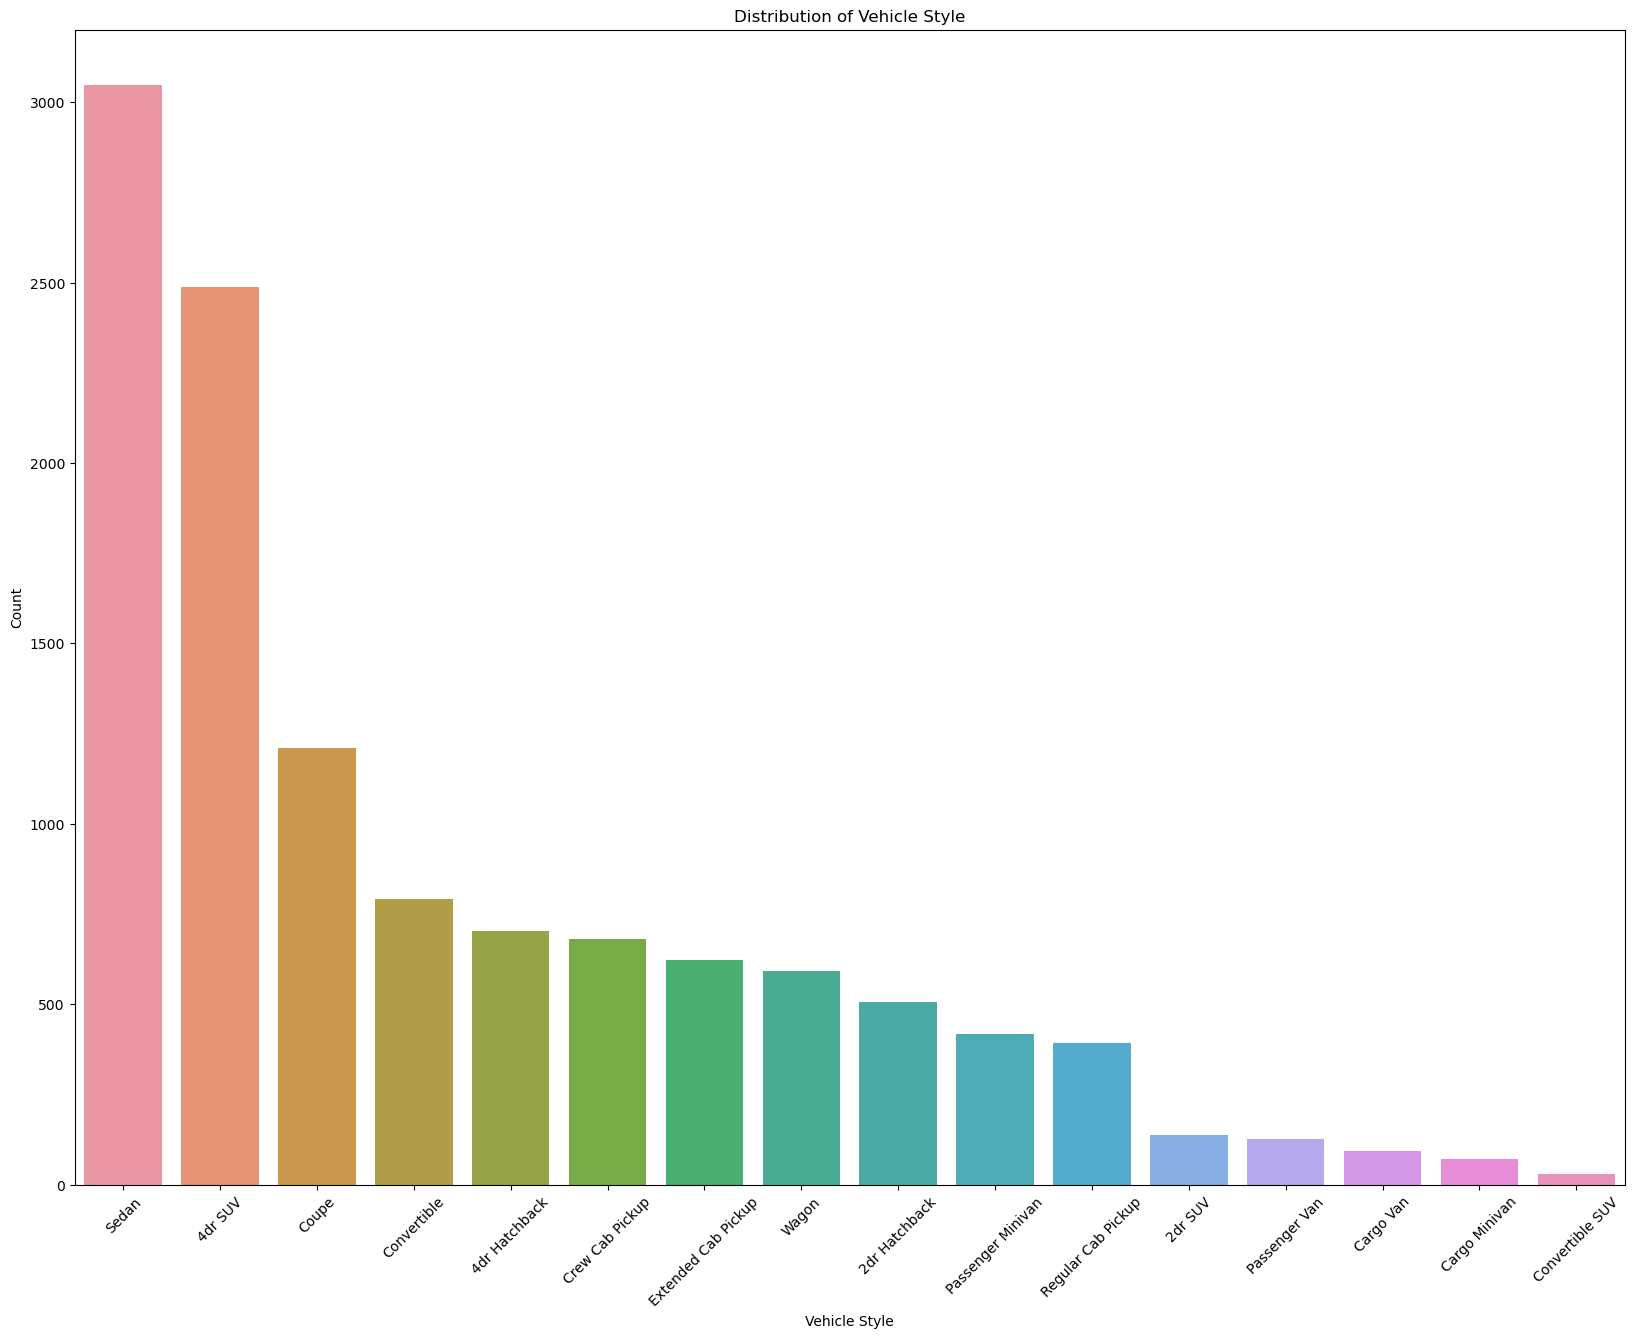

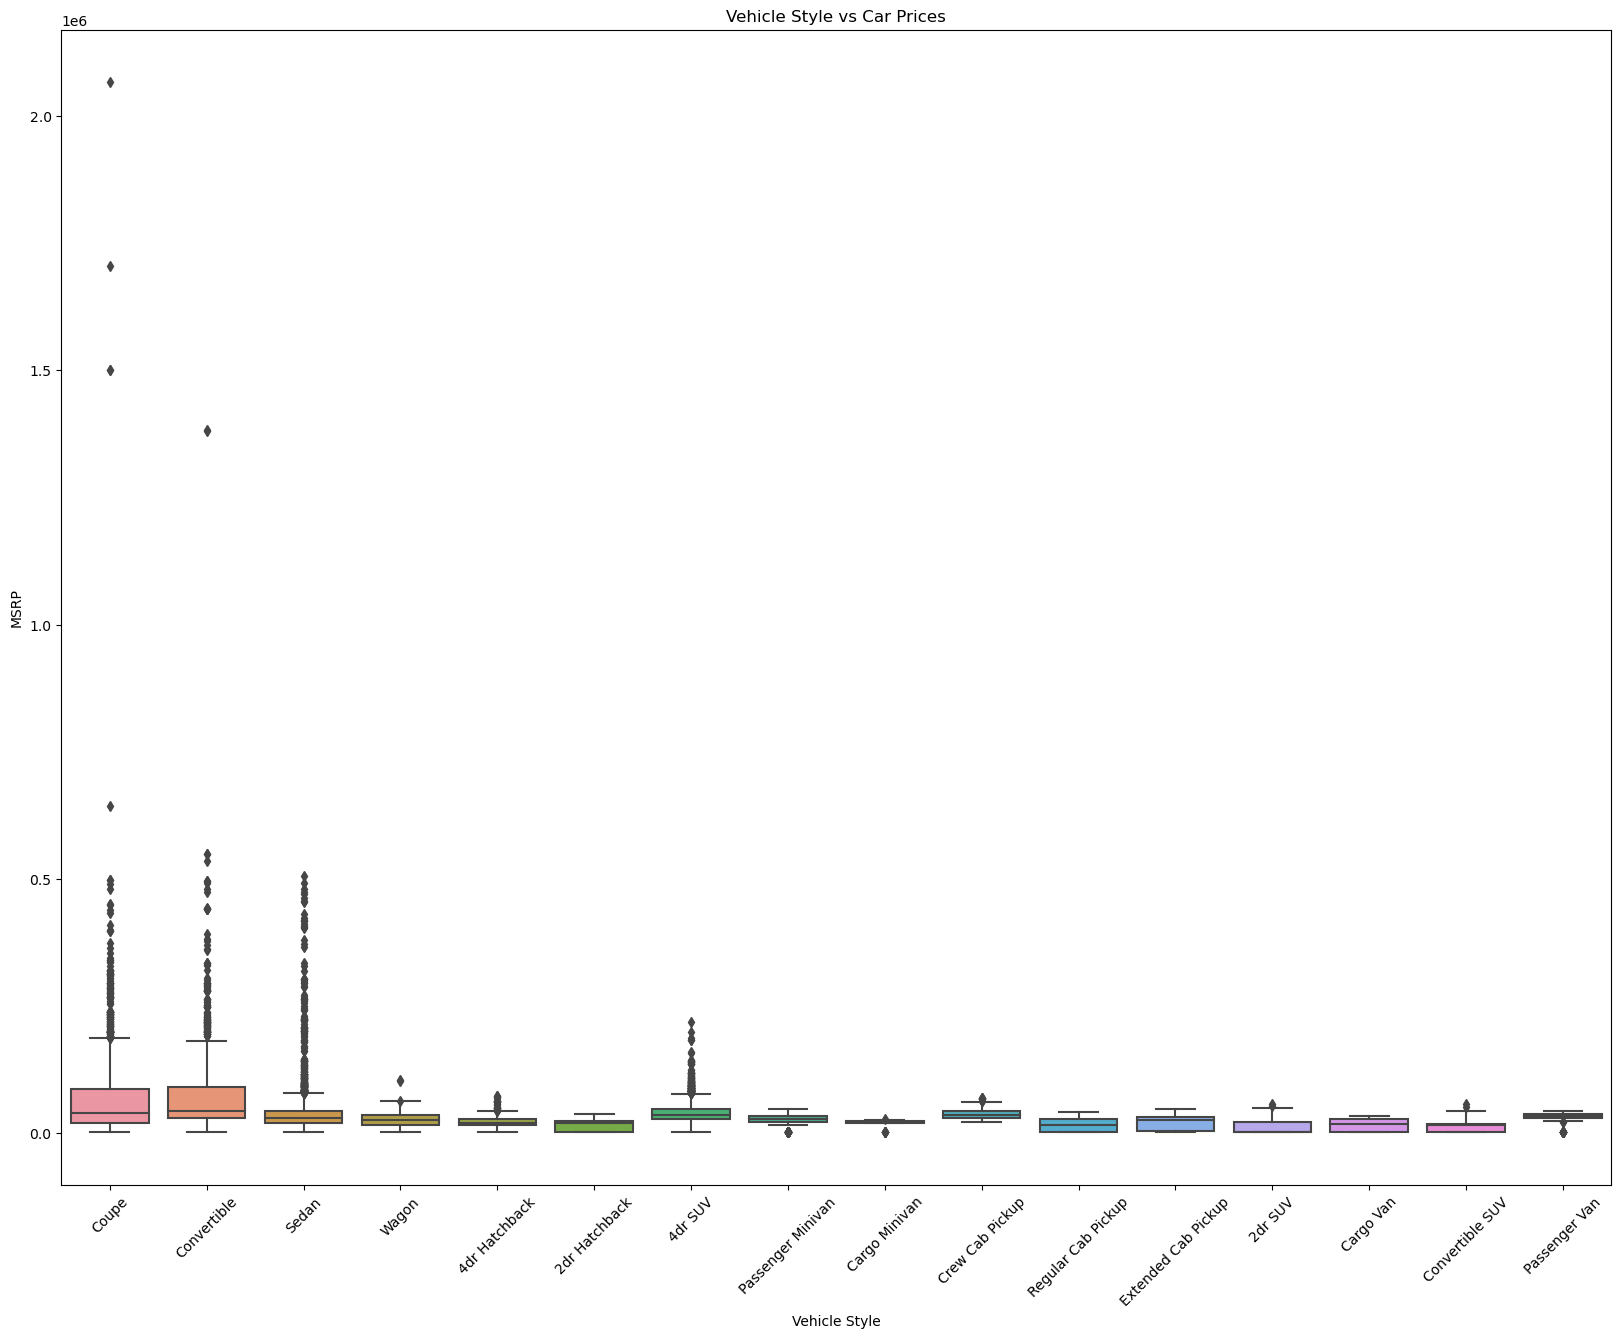

In [14]:


# Categorical feature analysis
categorical_features = ['Make', 'Model', 'Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Market Category', 'Vehicle Size', 'Vehicle Style']

for feature in categorical_features:
    # Plot the distribution of the categorical feature
    plt.figure(figsize=(20, 15))
    sns.countplot(data=df, x=feature, order=df[feature].value_counts().index)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

    # Analyze the relationship between the categorical feature and the target variable (MSRP)
    plt.figure(figsize=(20, 15))
    sns.boxplot(data=df, x=feature, y='MSRP')
    plt.title(f'{feature} vs Car Prices')
    plt.xlabel(feature)
    plt.ylabel('MSRP')
    plt.xticks(rotation=45)
    plt.show()


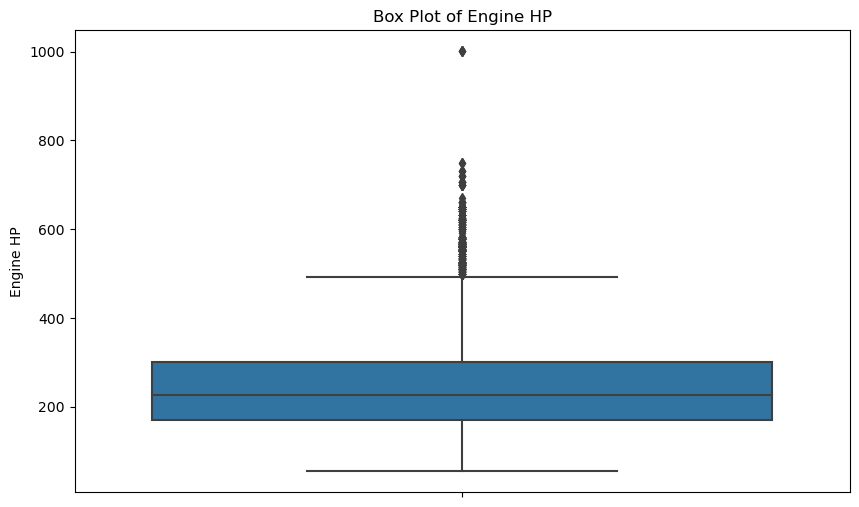

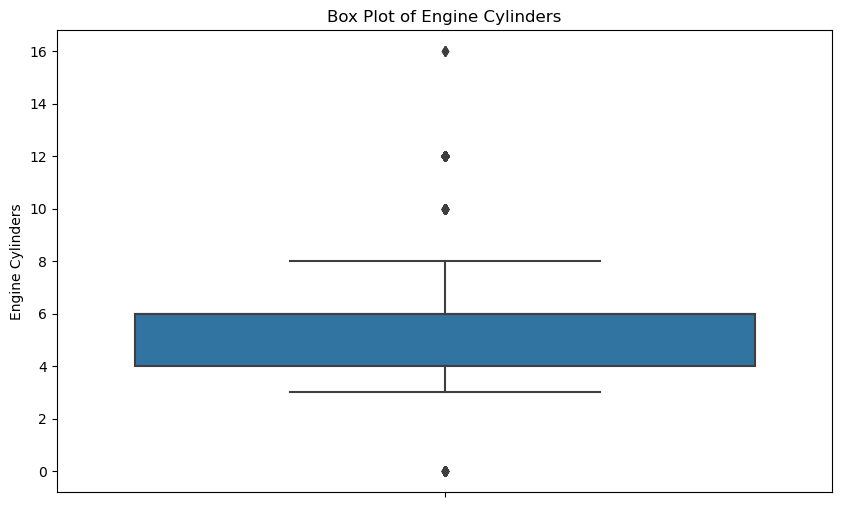

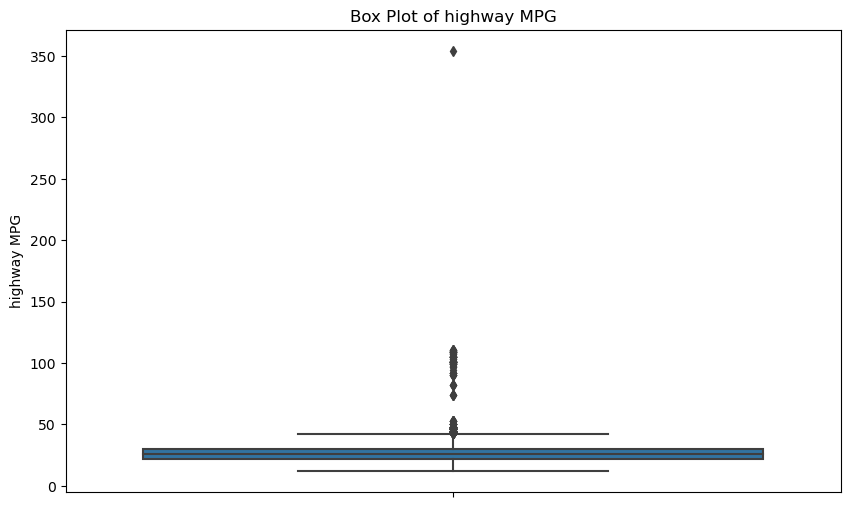

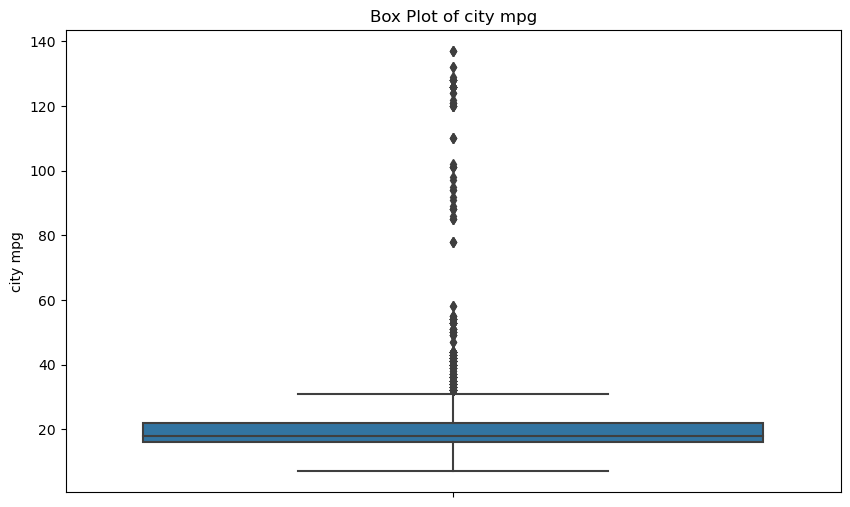

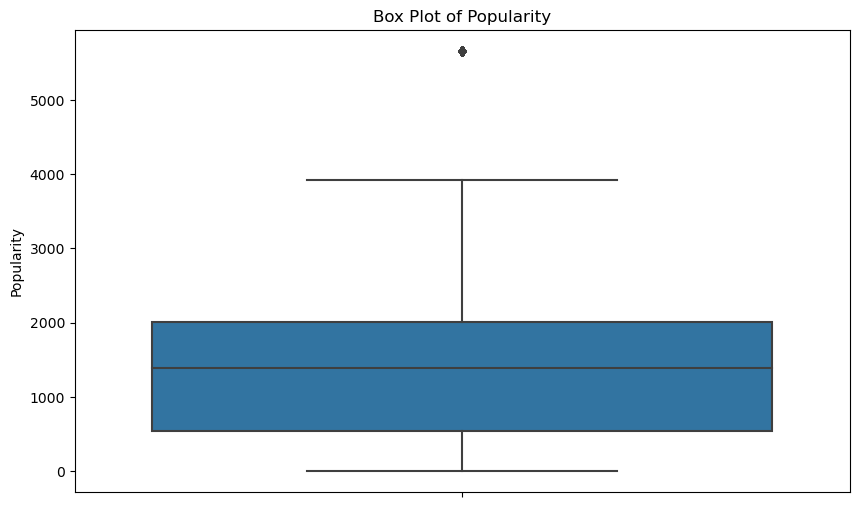

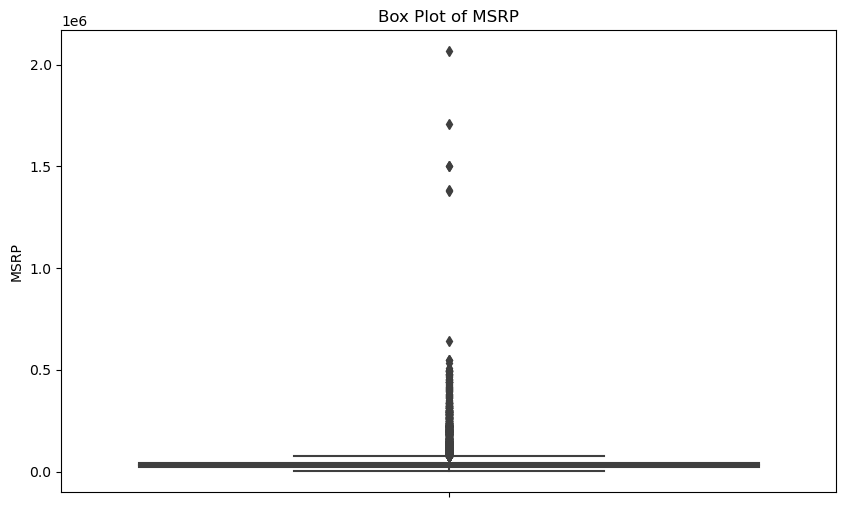

In [15]:
# Numerical feature outlier detection
numerical_features = ['Engine HP', 'Engine Cylinders', 'highway MPG', 'city mpg', 'Popularity', 'MSRP']

for feature in numerical_features:
    # Create a box plot for the feature
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, y=feature)
    plt.title(f'Box Plot of {feature}')
    plt.ylabel(feature)
    plt.show()

In [16]:
# Numerical feature outlier removal using IQR method
numerical_features = ['Engine HP', 'Engine Cylinders', 'highway MPG', 'city mpg', 'Popularity', 'MSRP']

for feature in numerical_features:
    # Calculate the IQR for the feature
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define the lower and upper bounds to identify outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Remove outliers from the feature
    df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]

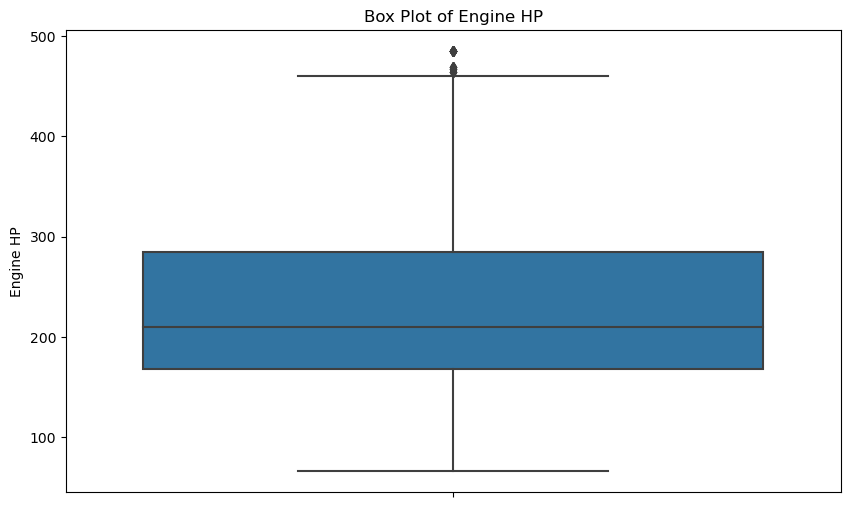

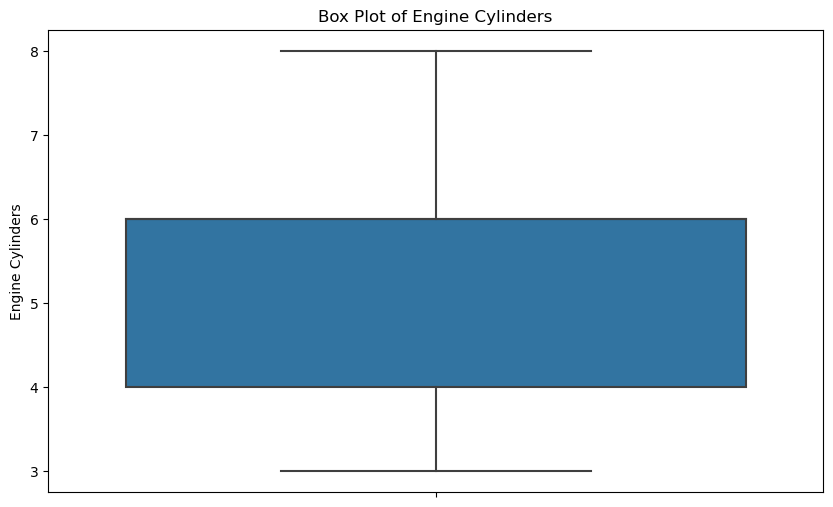

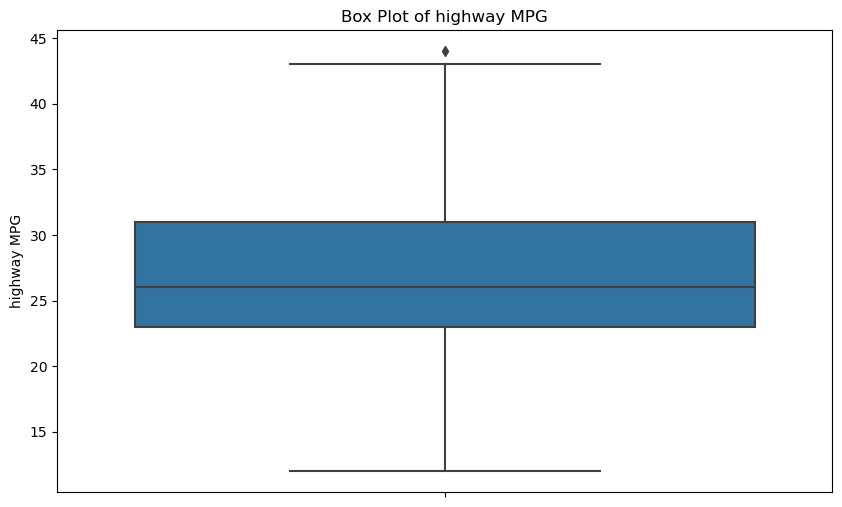

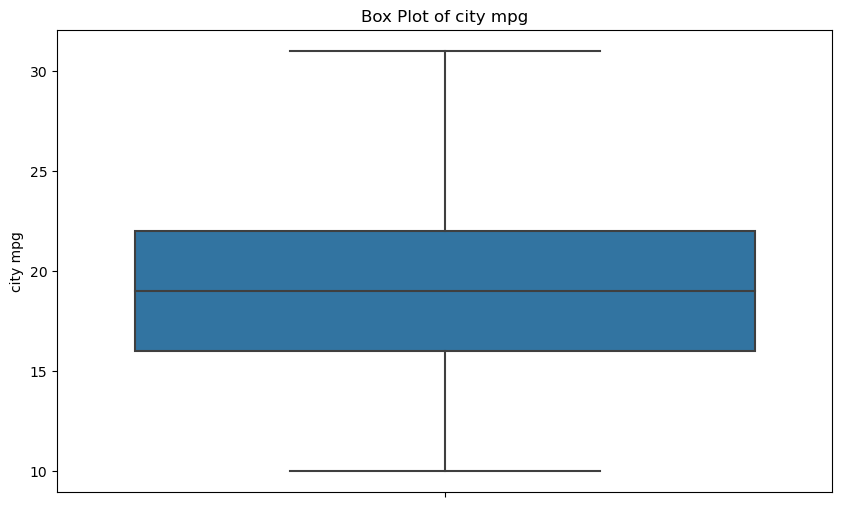

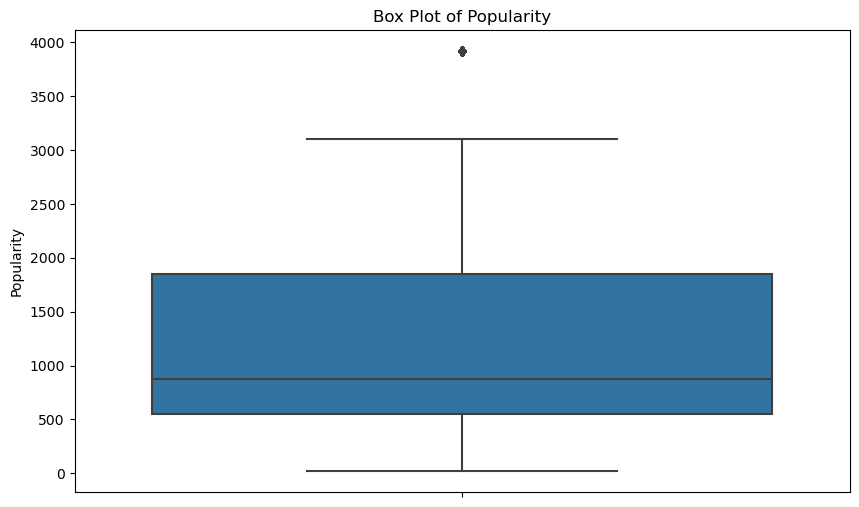

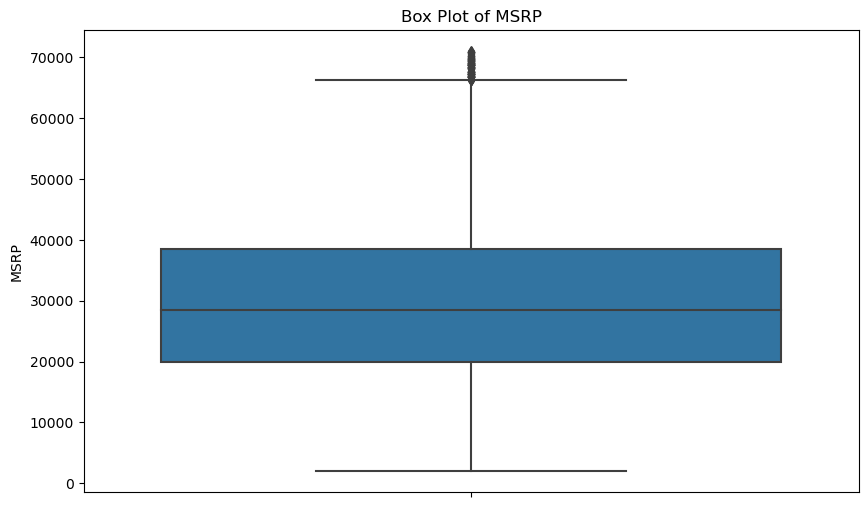

In [17]:
# Numerical feature outlier detection
numerical_features = ['Engine HP', 'Engine Cylinders', 'highway MPG', 'city mpg', 'Popularity', 'MSRP']

for feature in numerical_features:
    # Create a box plot for the feature
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, y=feature)
    plt.title(f'Box Plot of {feature}')
    plt.ylabel(feature)
    plt.show()

# Pre-processing


In [18]:
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [19]:
df.isna().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP               0
Engine Cylinders        0
Transmission Type       0
Driven_Wheels           0
Number of Doors         0
Market Category      3348
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [20]:
# Drop columns with a high percentage of missing values
df = df.drop(columns=['Market Category'])

In [21]:

# Fill missing values in numerical features with mean
numerical_features = ['Engine HP', 'Engine Cylinders']
df[numerical_features] = df[numerical_features].fillna(df[numerical_features].mean())

# Fill missing values in categorical features with mode
categorical_features = ['Engine Fuel Type', 'Number of Doors']
df[categorical_features] = df[categorical_features].fillna(df[categorical_features].mode().iloc[0])


In [22]:
df.isna().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

In [23]:
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,50920


In [24]:
df.shape

(9653, 15)

In [25]:
# Convert categorical variables to numerical using Label Encoding
categorical_features = ['Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Vehicle Size', 'Vehicle Style']
for feature in categorical_features:
    label_encoder = LabelEncoder()
    df[feature] = label_encoder.fit_transform(df[feature])

In [26]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,6,335.0,6.0,2,3,2.0,0,8,26,19,3916,46135
1,BMW,1 Series,2011,6,300.0,6.0,2,3,2.0,0,6,28,19,3916,40650
2,BMW,1 Series,2011,6,300.0,6.0,2,3,2.0,0,8,28,20,3916,36350
3,BMW,1 Series,2011,6,230.0,6.0,2,3,2.0,0,8,28,18,3916,29450
4,BMW,1 Series,2011,6,230.0,6.0,2,3,2.0,0,6,28,18,3916,34500


In [27]:
df['Model'].unique()

array(['1 Series M', '1 Series', '100', '124 Spider', '190-Class',
       '2 Series', '200', '200SX', '240SX', '240', '2',
       '3 Series Gran Turismo', '3 Series', '300-Class', '3000GT', '300',
       '300M', '300ZX', '323', '350-Class', '350Z', '370Z', '3',
       '4 Series Gran Coupe', '4 Series', '400-Class', '420-Class', '4C',
       '4Runner', '5 Series Gran Turismo', '5 Series', '500-Class', '500',
       '500L', '500X', '560-Class', '5', '6000', '626', '6', '718 Cayman',
       '740', '760', '780', '8 Series', '80', '850', '86', '9-2X',
       '9-3 Griffin', '9-3', '9-4X', '9-5', '9-7X', '9000', '900', '90',
       '928', '929', '940', '944', '960', '968', 'A3', 'A4 allroad', 'A4',
       'A5', 'A6', 'A7', 'Acadia Limited', 'Acadia', 'Accent', 'Acclaim',
       'Accord Crosstour', 'Accord', 'Achieva', 'ActiveHybrid 5', 'Aerio',
       'Alero', 'Allante', 'allroad quattro', 'allroad', 'Altima',
       'Amanti', 'Armada', 'Aspen', 'Astro Cargo', 'Astro', 'ATS Coupe',
       'AT

In [29]:
from sklearn.model_selection import train_test_split

In [38]:
# Split the dataset into training and testing sets
X = df.drop(['Make','Model','MSRP'],axis=1)
y = df['MSRP']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [39]:
X

,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity
0,2011,6,335.0,6.0,2,3,2.0,0,8,26,19,3916
1,2011,6,300.0,6.0,2,3,2.0,0,6,28,19,3916
2,2011,6,300.0,6.0,2,3,2.0,0,8,28,20,3916
3,2011,6,230.0,6.0,2,3,2.0,0,8,28,18,3916
4,2011,6,230.0,6.0,2,3,2.0,0,6,28,18,3916
...,...,...,...,...,...,...,...,...,...,...,...,...
11909,2012,6,300.0,6.0,1,0,4.0,2,2,23,16,204
11910,2012,6,300.0,6.0,1,0,4.0,2,2,23,16,204
11911,2012,6,300.0,6.0,1,0,4.0,2,2,23,16,204
11912,2013,5,300.0,6.0,1,0,4.0,2,2,23,16,204


In [35]:
y

0        46135
1        40650
2        36350
3        29450
4        34500
         ...  
11909    46120
11910    56670
11911    50620
11912    50920
11913    28995
Name: MSRP, Length: 9653, dtype: int64

In [40]:
X.shape

(9653, 12)

In [41]:
y.shape

(9653,)

In [43]:
from sklearn.preprocessing import StandardScaler
# Feature scaling using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test =scaler.fit_transform(X_test)

# Modelling

In [48]:
# from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train, y_train)

# Evaluate the model
y_pred_linear = linear_model.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print('Linear Regression - Mean Squared Error (MSE):', mse_linear)
print('Linear Regression - R-squared Score:', r2_linear)

# Initialize the Decision Tree Regression model
dt_model = DecisionTreeRegressor()

# Train the model
dt_model.fit(X_train, y_train)

# Evaluate the model
y_pred_dt = dt_model.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print('Decision Tree Regression - Mean Squared Error (MSE):', mse_dt)
print('Decision Tree Regression - R-squared Score:', r2_dt)

Linear Regression - Mean Squared Error (MSE): 58819777.12103558
Linear Regression - R-squared Score: 0.7728518980050745
Decision Tree Regression - Mean Squared Error (MSE): 26451269.297966782
Decision Tree Regression - R-squared Score: 0.8978514385726728


In [47]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the RandomForestRegressor model
rf_model = RandomForestRegressor()

# Train the model
rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print('Random Forest Regression - Mean Squared Error (MSE):', mse_rf)
print('Random Forest Regression - R-squared Score:', r2_rf)


Random Forest Regression - Mean Squared Error (MSE): 16229738.614643384
Random Forest Regression - R-squared Score: 0.9373245785239199


# Fine tuning

In [49]:

from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 5, 10],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required at each leaf node
}

# Initialize the RandomForestRegressor model
rf_model = RandomForestRegressor()

# Perform grid search cross-validation
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best model with tuned hyperparameters
best_model = grid_search.best_estimator_

# Evaluate the best model on the testing dataset
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Best Model - Mean Squared Error (MSE):', mse)
print('Best Model - R-squared Score:', r2)


Best Model - Mean Squared Error (MSE): 15620700.54147138
Best Model - R-squared Score: 0.9396765398732293
